In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv('C:\\Users\\abhin\\Downloads\\CarPrice_Assignment (1).csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.shape

(205, 26)

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
#listing unique values in each columns and its length
print('Unique value in each column and its length')
for column in df.columns:
    unique_values = df[column].unique()
    length = len(df[column].unique())
    print(column,':',unique_values,'(Length:',length,')')

Unique value in each column and its length
car_ID : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205] (Length: 205 )
symboling : [ 3  1  2  0 -1 -2] (Length: 6 )
CarName : ['alfa-romero giulia' 'alfa-romero stelvio' '

In [12]:
#listing unique values in each columns and its length
print('Unique value in each column and its length')
for column in df.columns:
    unique_values = df[column].unique()
    length = len(df[column].unique())
    print(column,':',unique_values,'(Length:',length,')')

Unique value in each column and its length
car_ID : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205] (Length: 205 )
symboling : [ 3  1  2  0 -1 -2] (Length: 6 )
CarName : ['alfa-romero giulia' 'alfa-romero stelvio' '

In [13]:
df.drop('car_ID',axis = 1,inplace = True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
CompanyName = df['CarName'].apply(lambda x:x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)
df.drop(['CarName'],axis = 1,inplace = True)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [18]:
corrections = {
    'maxda':'mazda',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
}
df['CompanyName'] = df['CompanyName'].replace(corrections)
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
df['symboling'].astype('category').value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

In [20]:
# changing the datatype of symboling from integer to string as it is categorical variable
df['symboling'] = df['symboling'].astype(str)

In [21]:
df['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [22]:
df['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [23]:
#separate numerical and categorical variables

numerical_vars = []
categorical_vars = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)

#dispaly the lists
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Categorical variables: ['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [24]:
df.describe(include='object').T

,count,unique,top,freq
symboling,205,6,0,67
fueltype,205,2,gas,185
CompanyName,205,23,toyota,32
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159


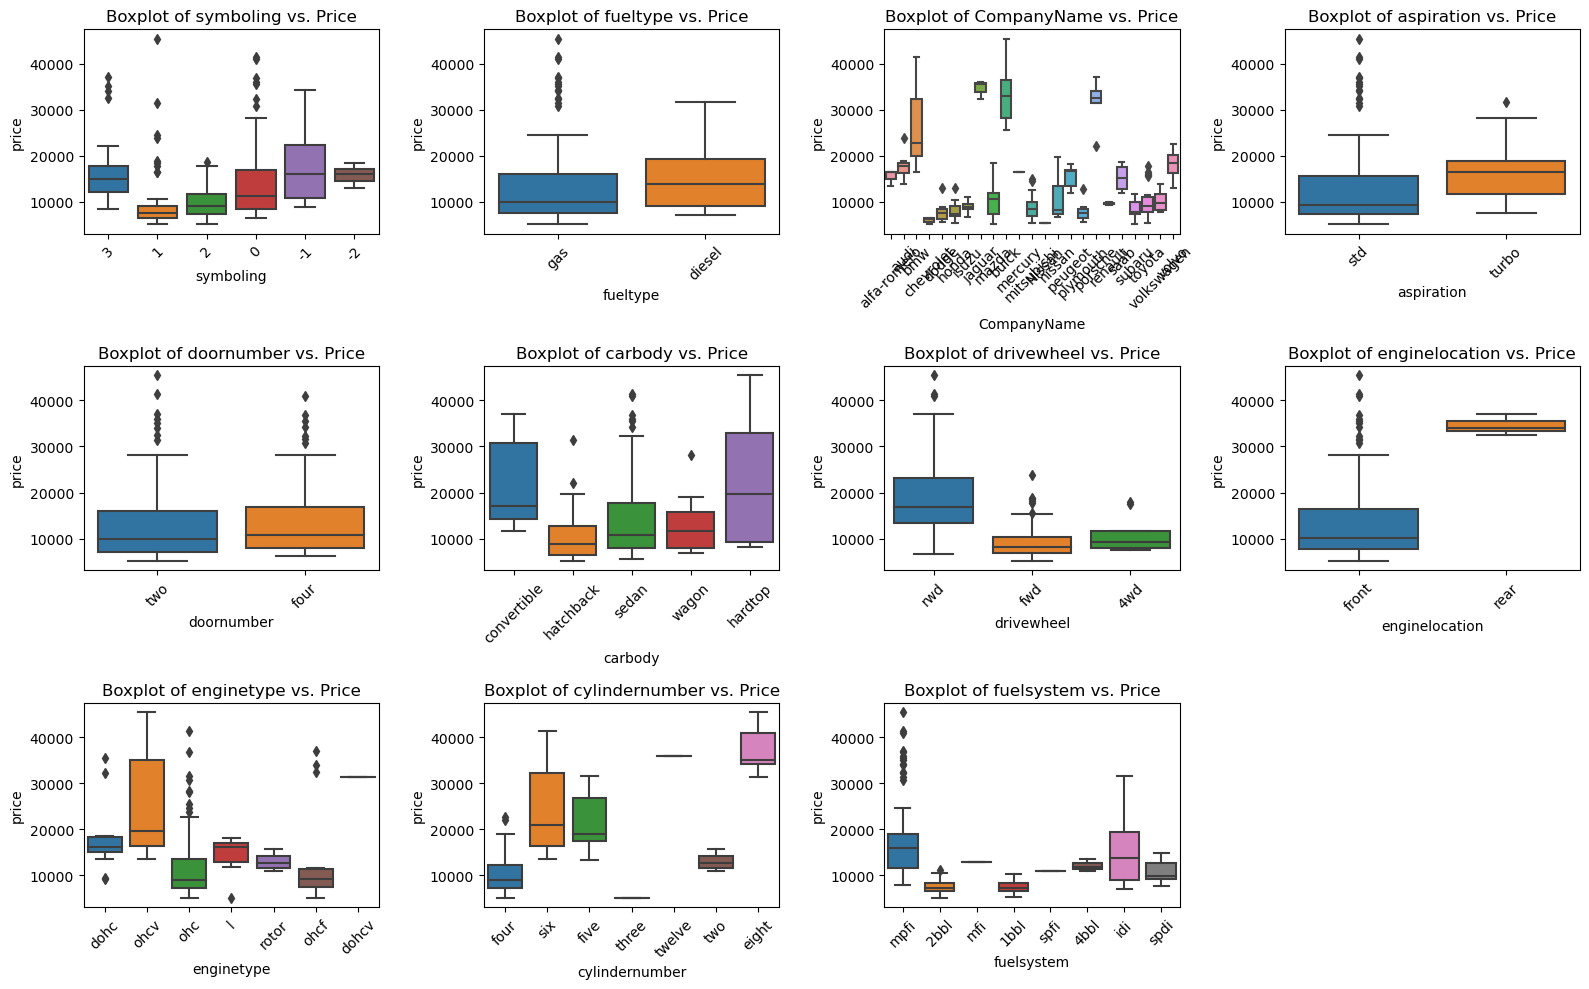

In [25]:
#create boxplot for each categorical variable against the target variable
plt.figure(figsize = (16,10))
for i,col in enumerate(categorical_vars):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=col, y= 'price', data=df)
    plt.title(f'Boxplot of {col} vs. Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

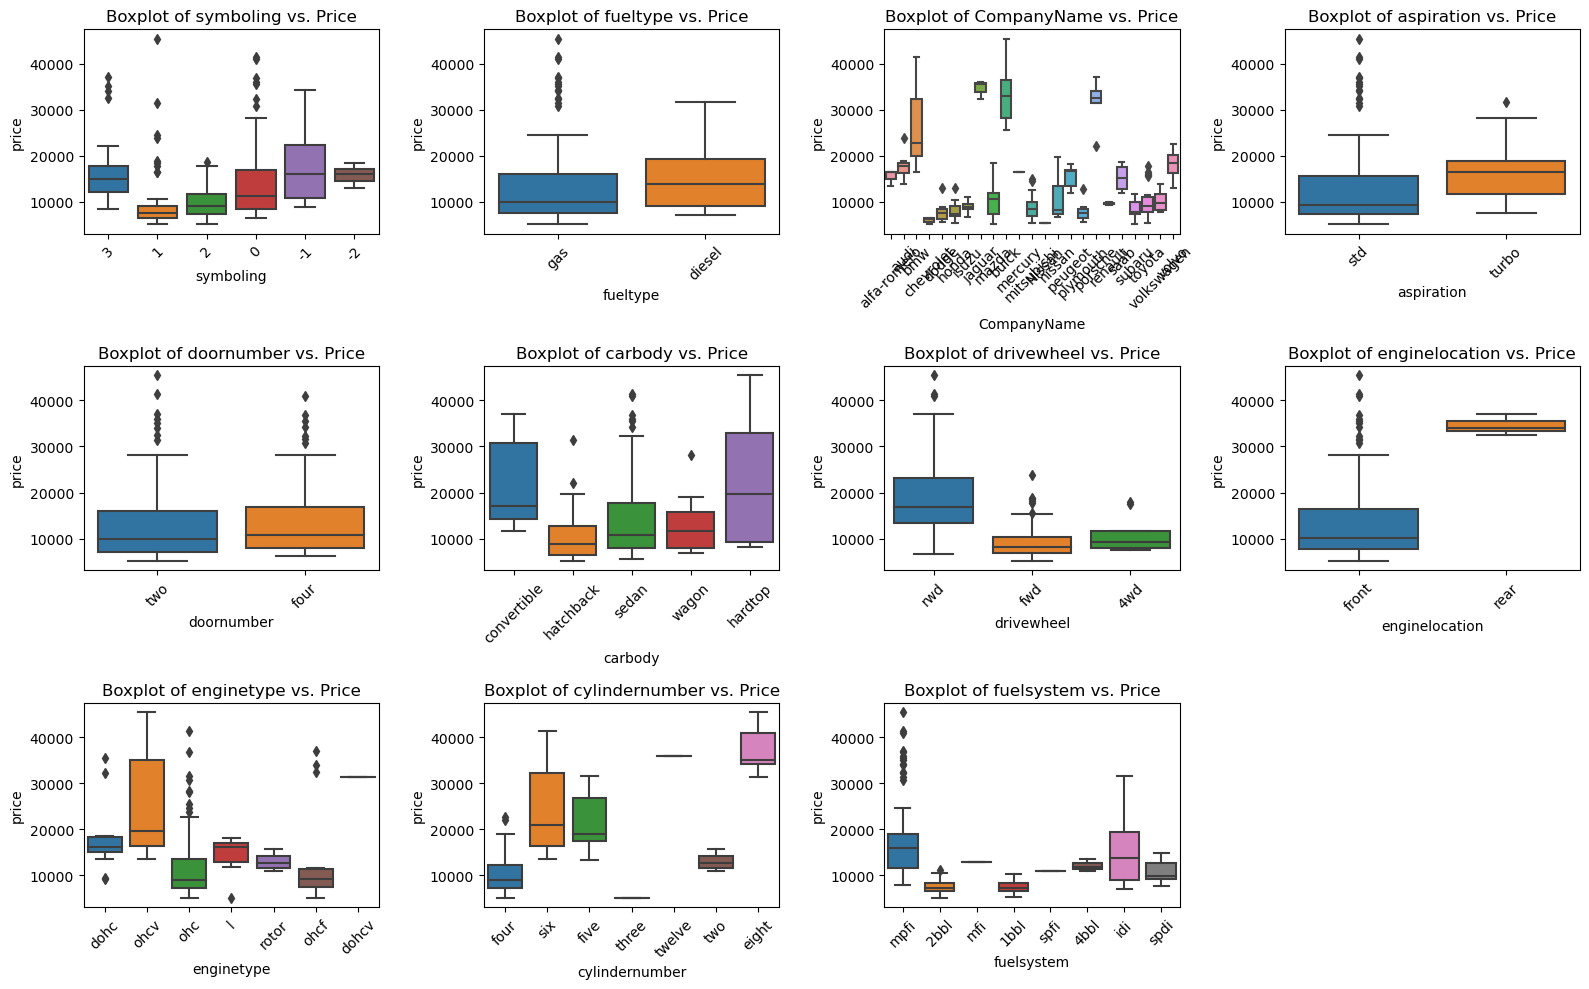

In [26]:
#create boxplot for each categorical variable against the target variable
plt.figure(figsize = (16,10))
for i,col in enumerate(categorical_vars):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=col, y= 'price', data=df)
    plt.title(f'Boxplot of {col} vs. Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

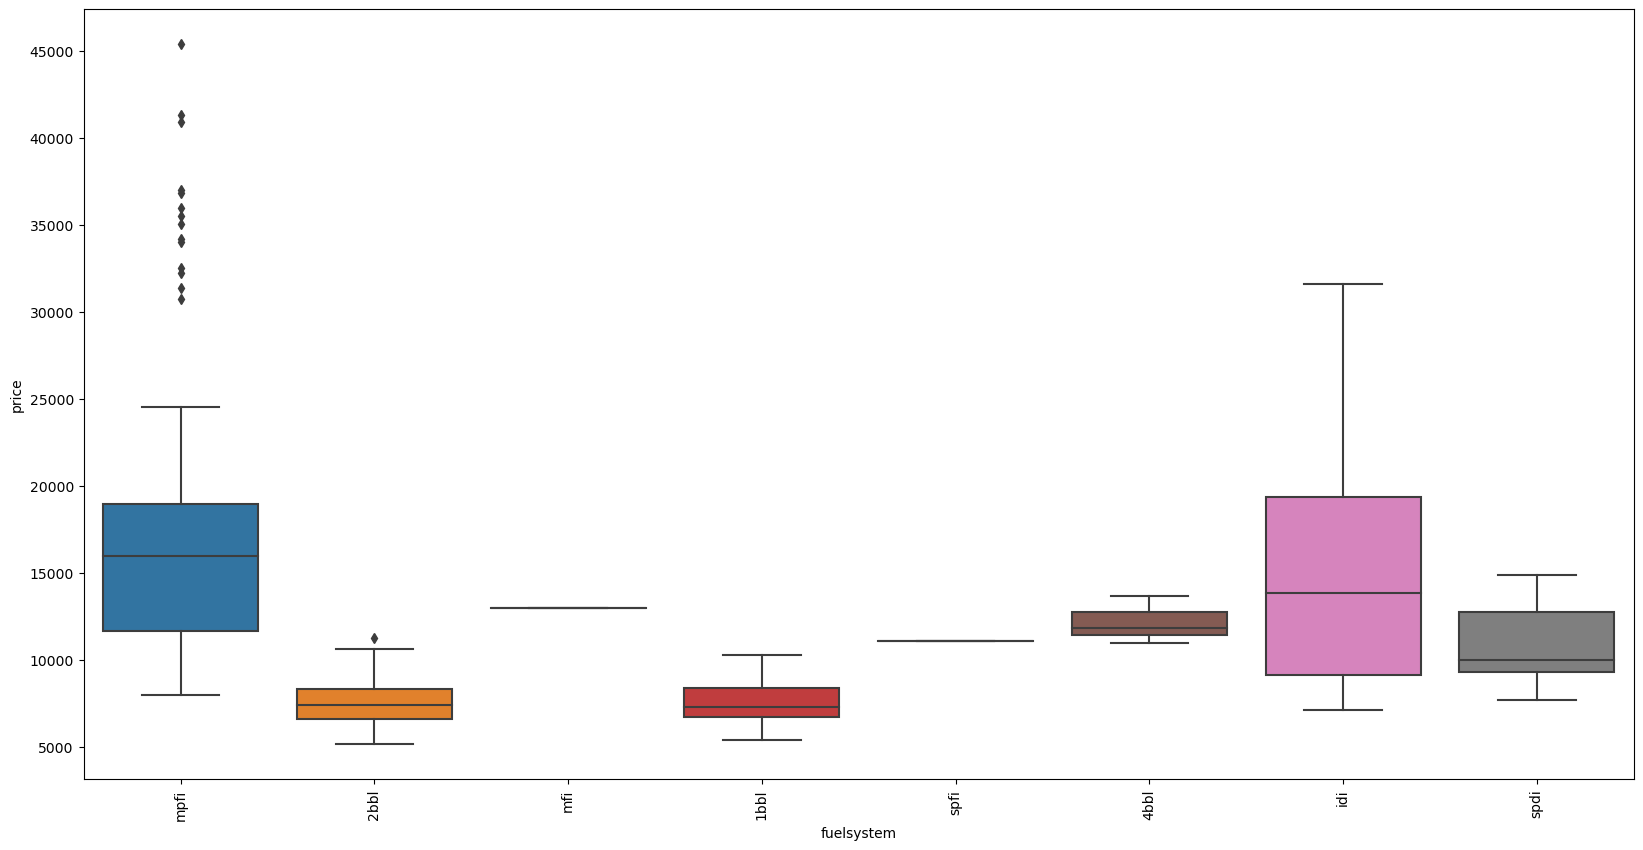

Average US car price:  13276.710570731706
CompanyName
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_vars[-1], y = 'price', data =df)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',df['price'].mean())
print(df.groupby('CompanyName').price.mean().sort_values(ascending=False).head())

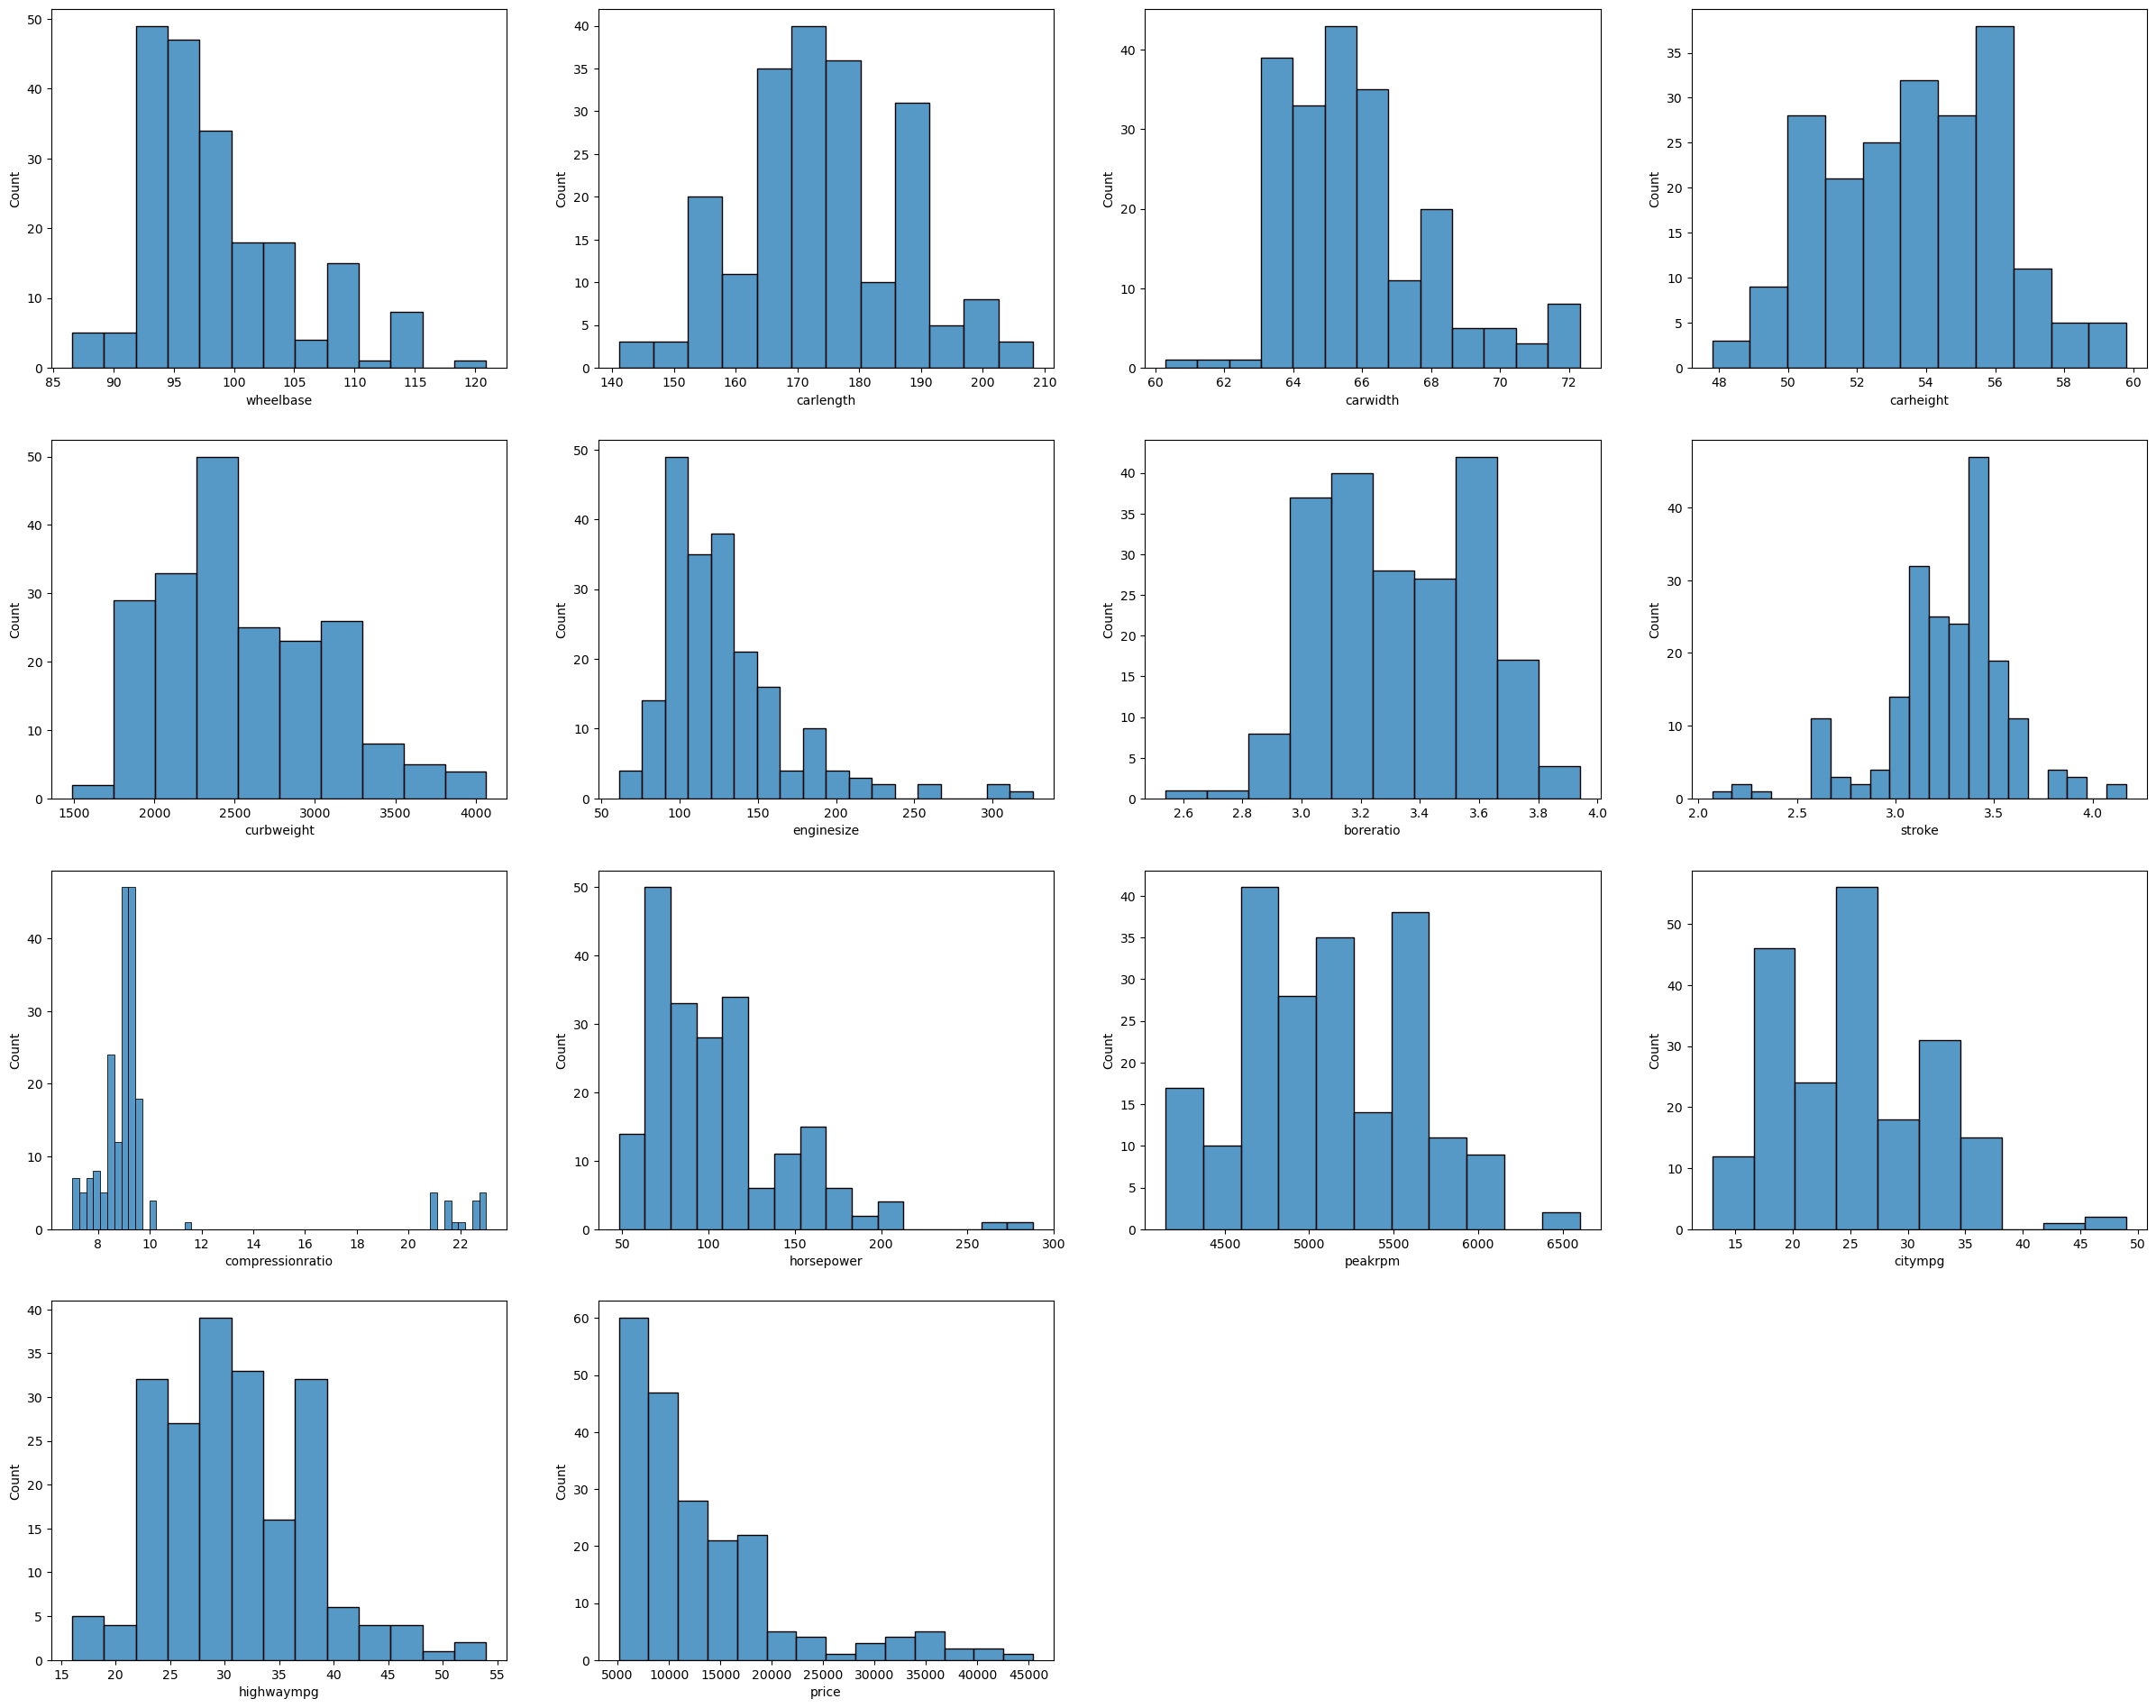

In [28]:
# distribution of numerical variables

fig = plt.figure(figsize=(30,30))
counter = 0

for col in numerical_vars:
    fig.add_subplot(5,4,counter+1)
    sns.histplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

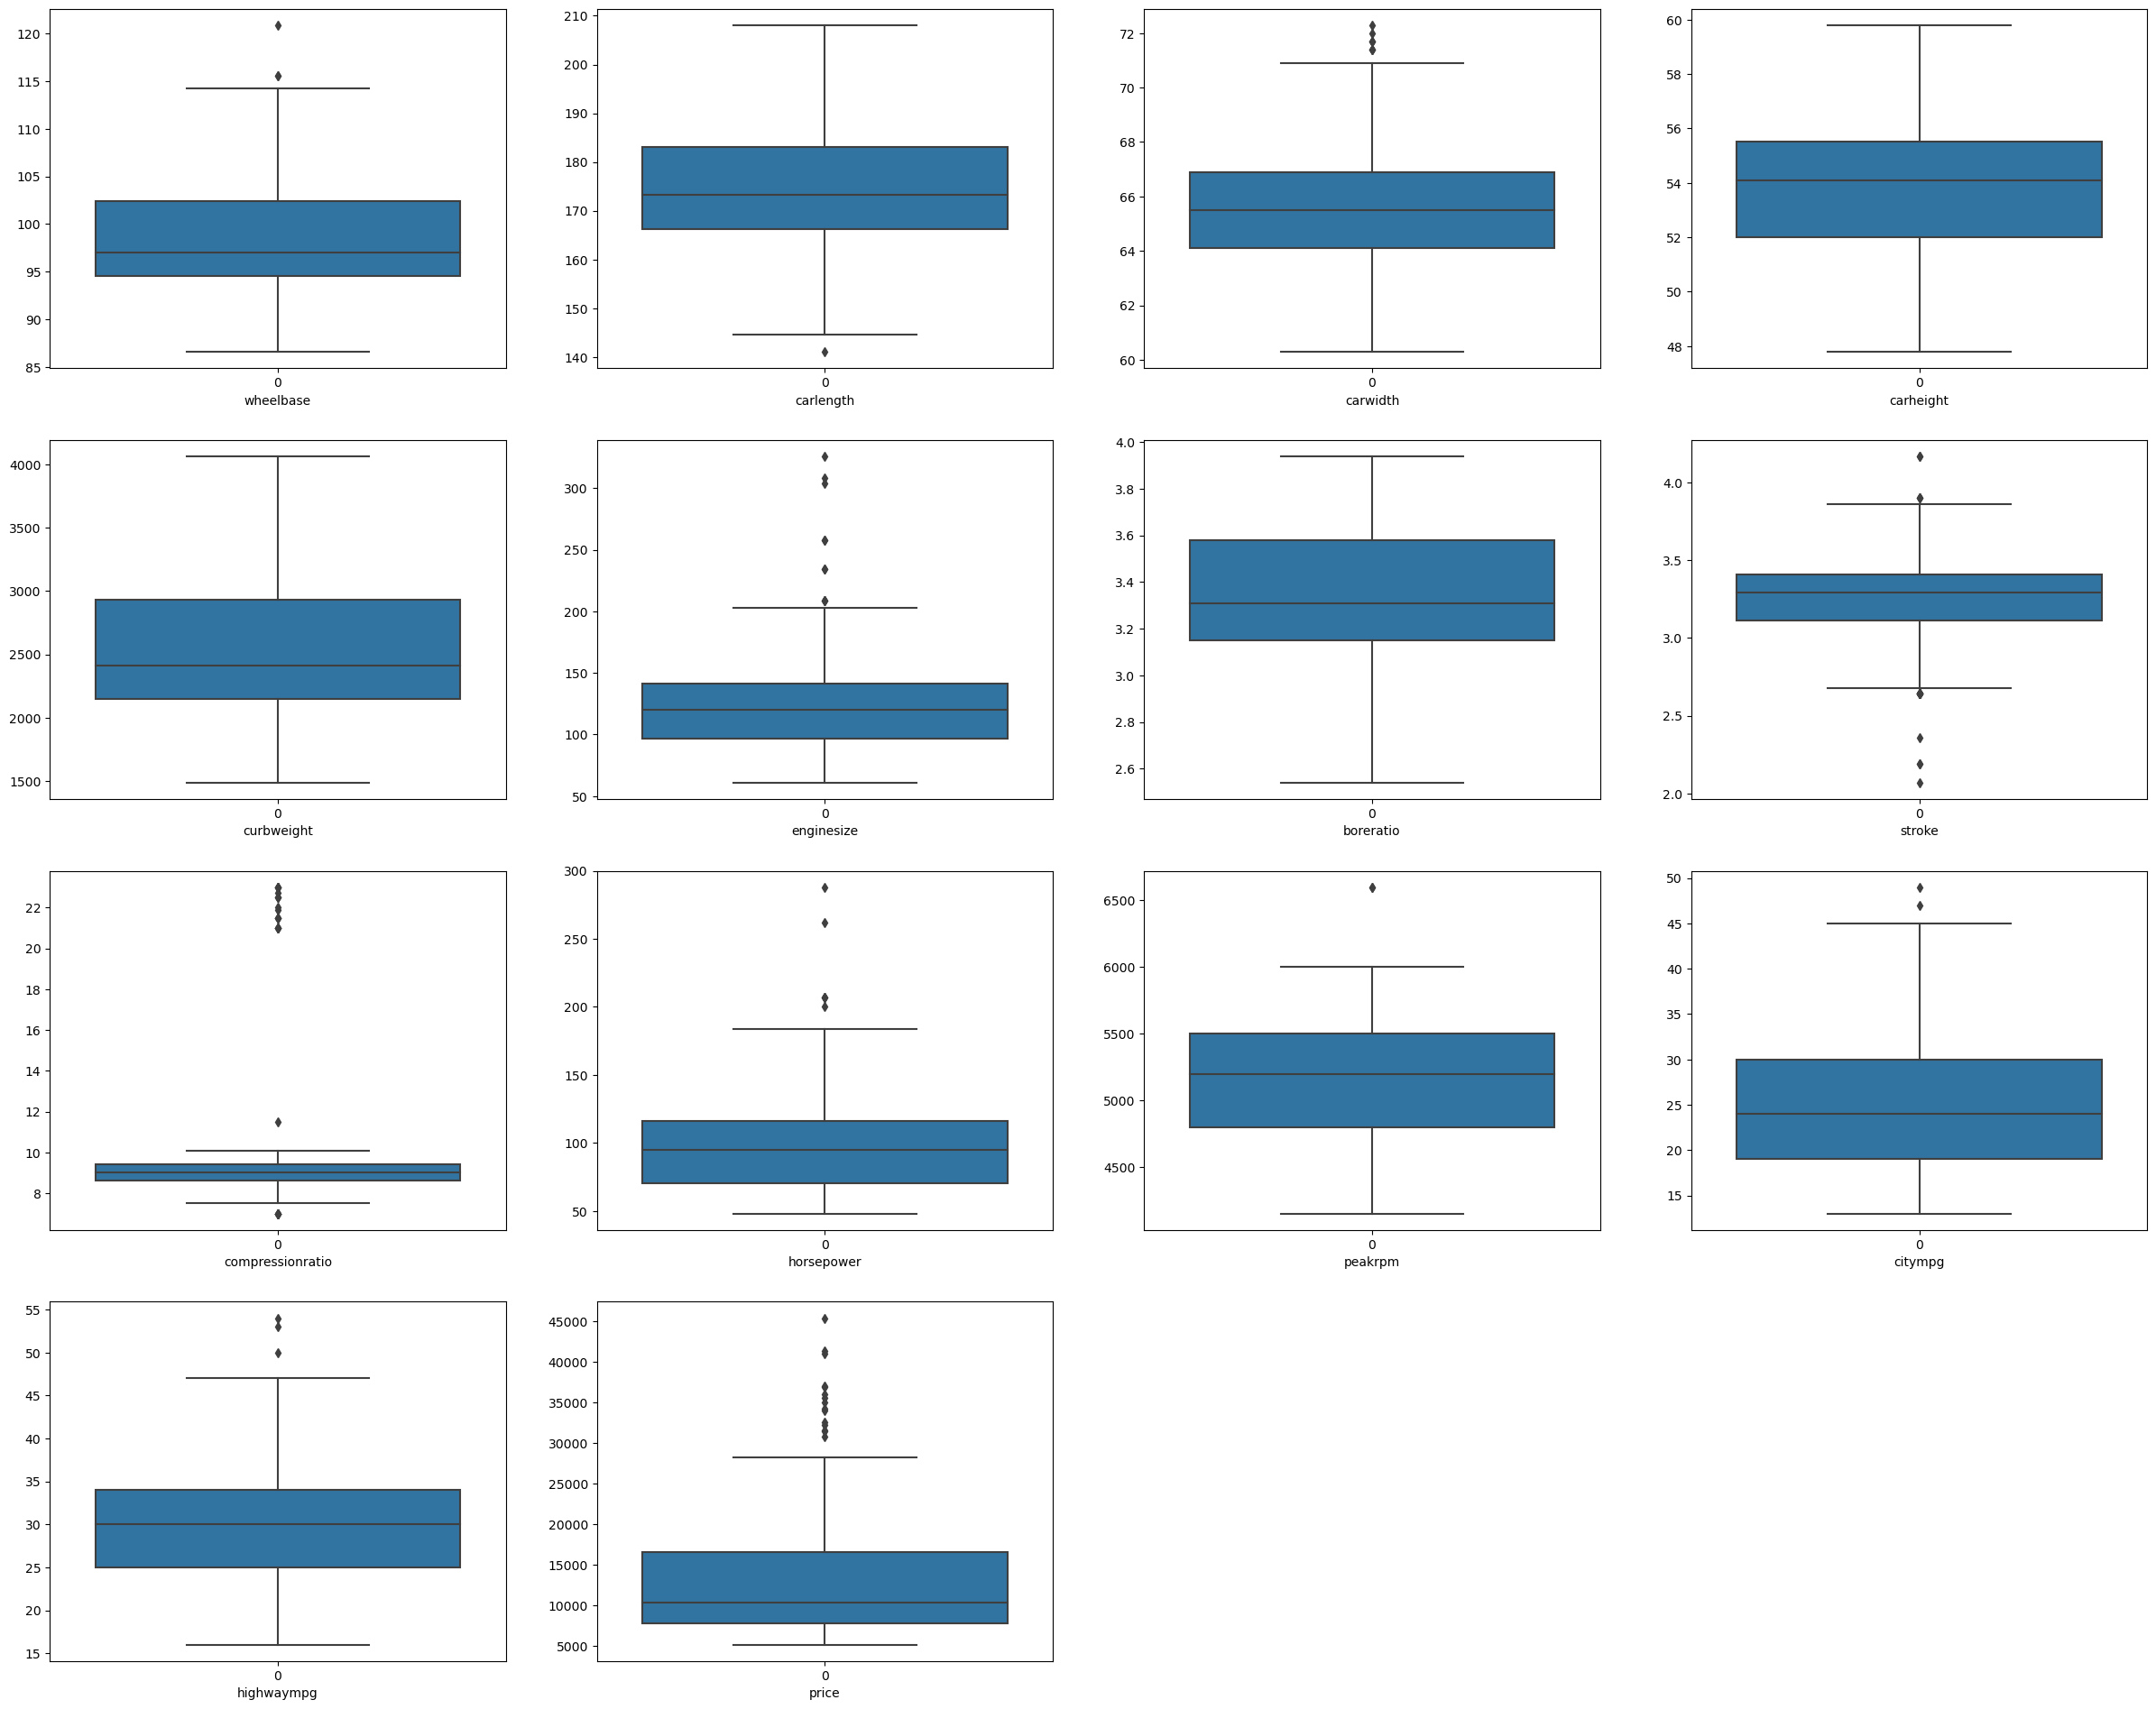

In [29]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in numerical_vars:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1
    

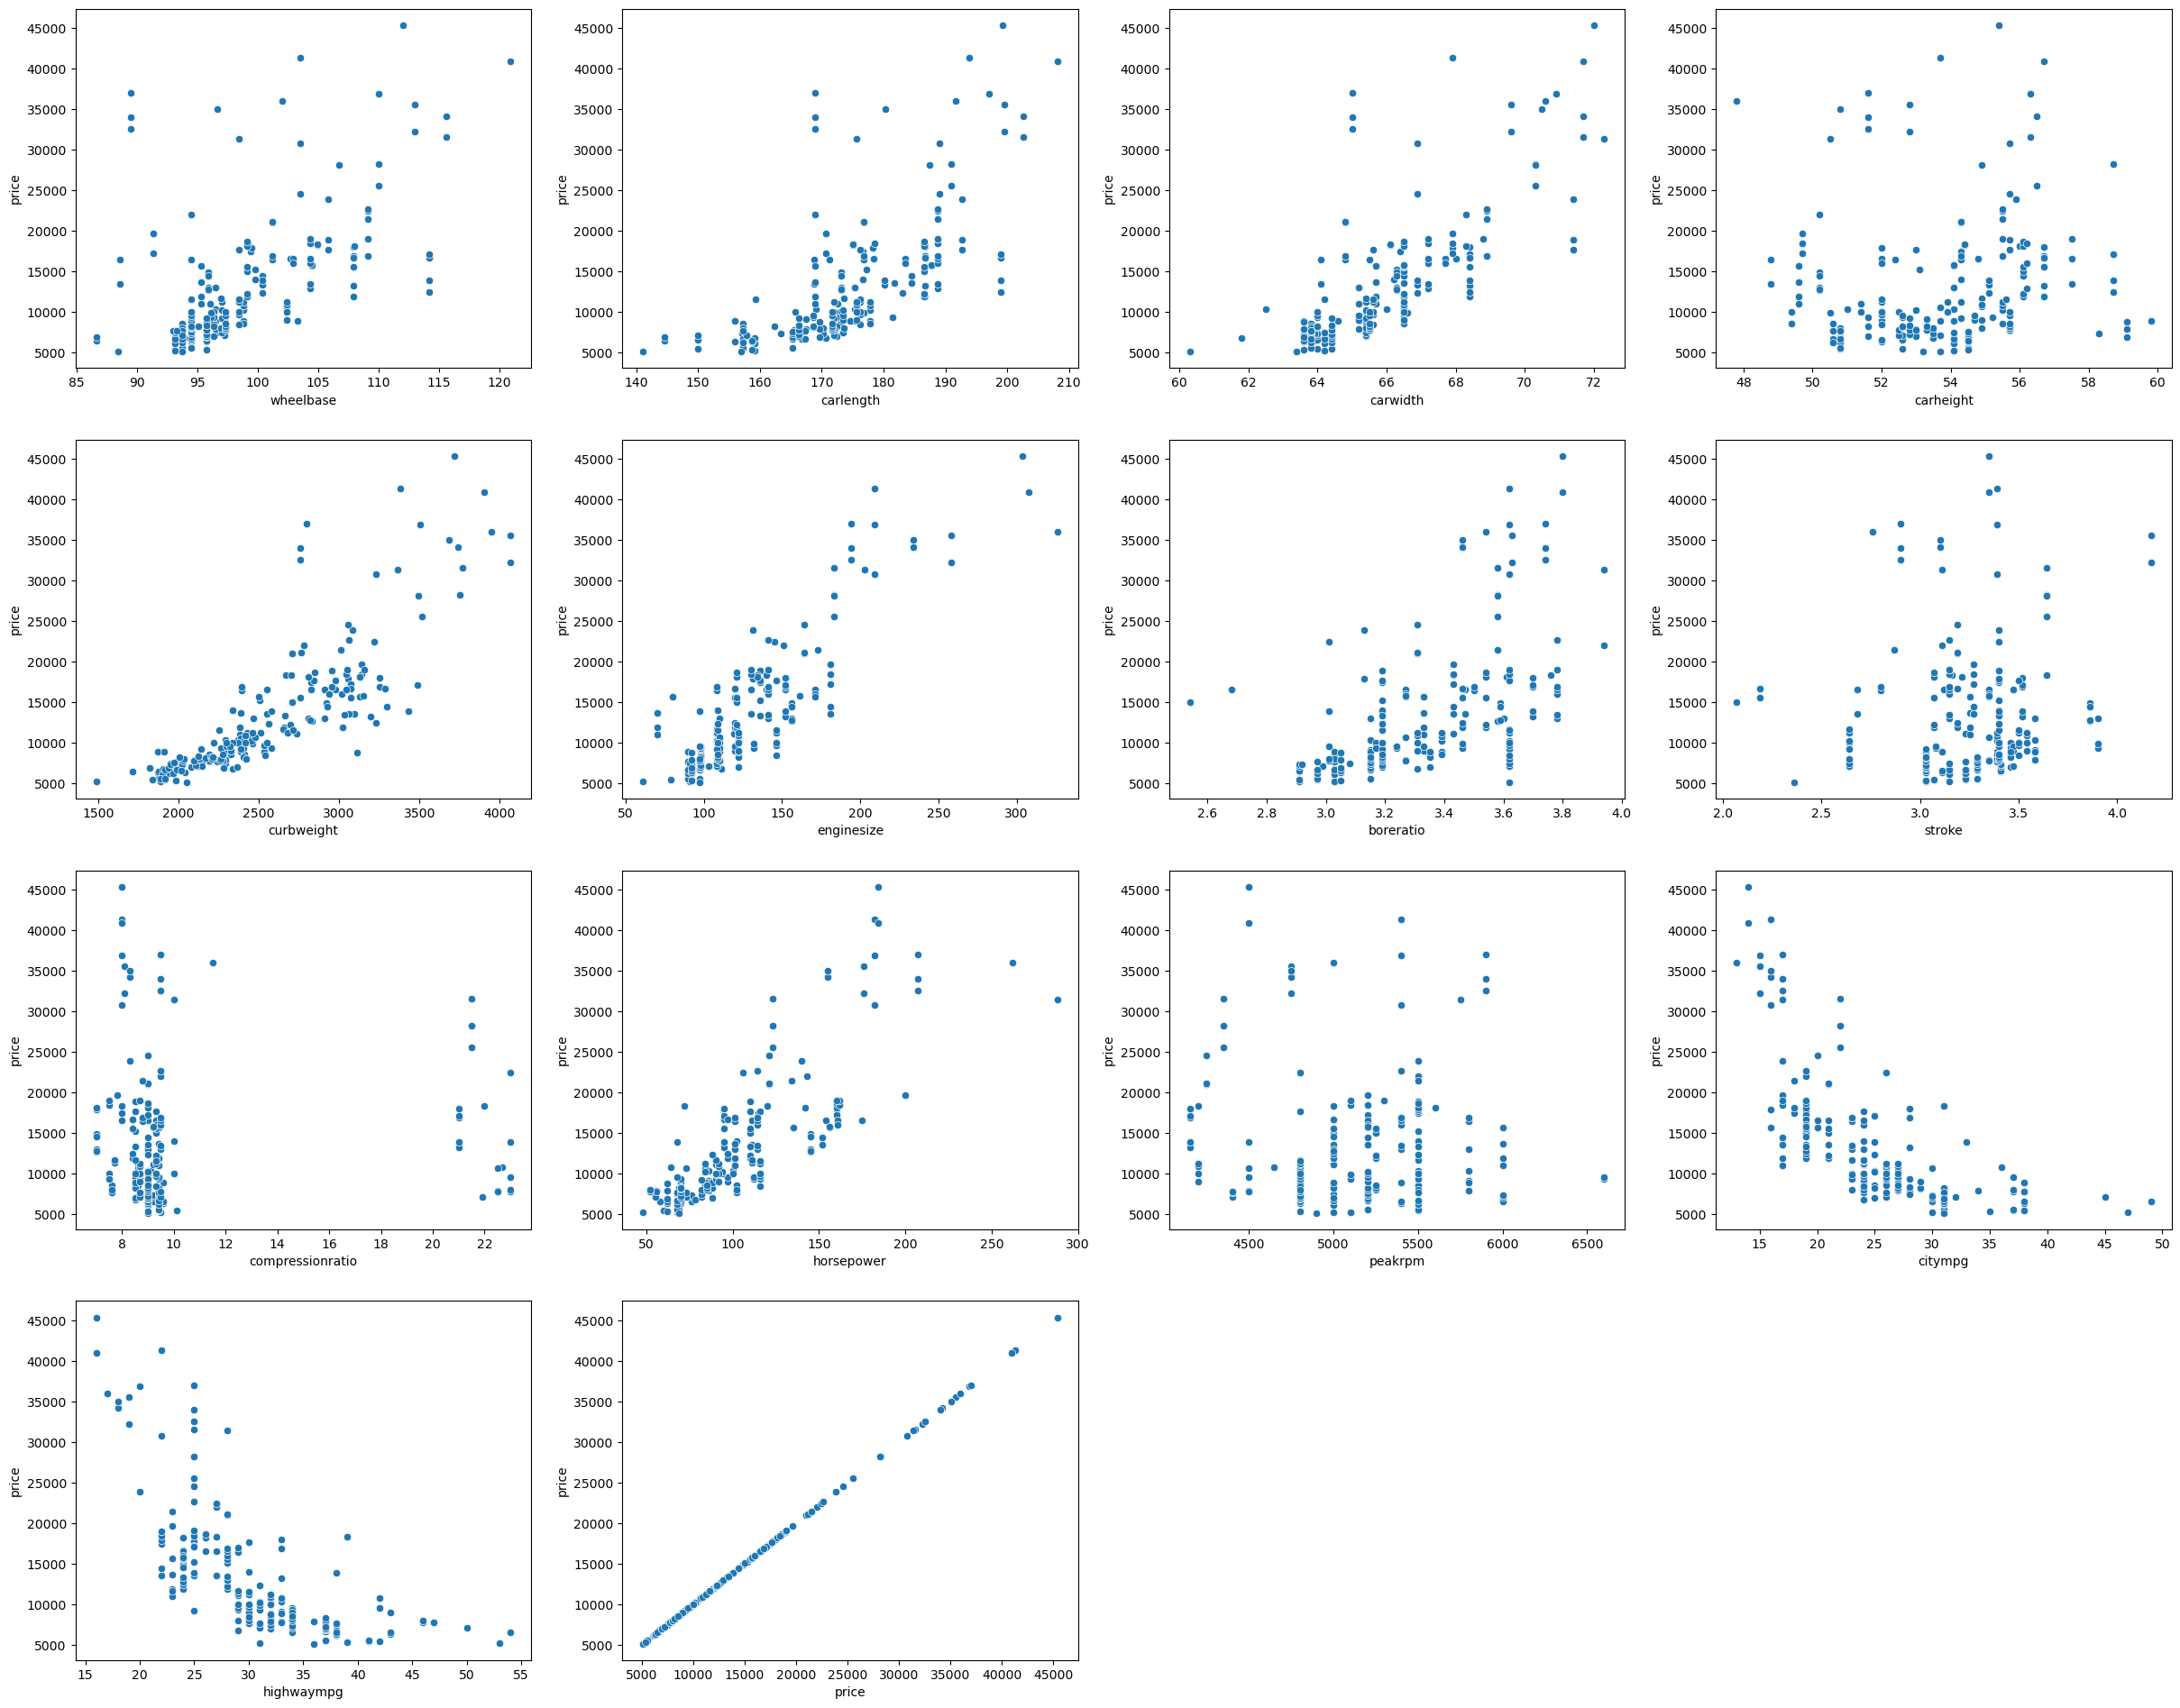

In [30]:
# scatter plot to visualize relationship between target variable ('price') & numerical variables
fig = plt.figure(figsize=(30,30))
counter = 0

for col in numerical_vars:
    fig.add_subplot(5,4,counter+1)
    sns.scatterplot(data=df,x=col,y='price')
    plt.xlabel(col)
    counter = counter + 1

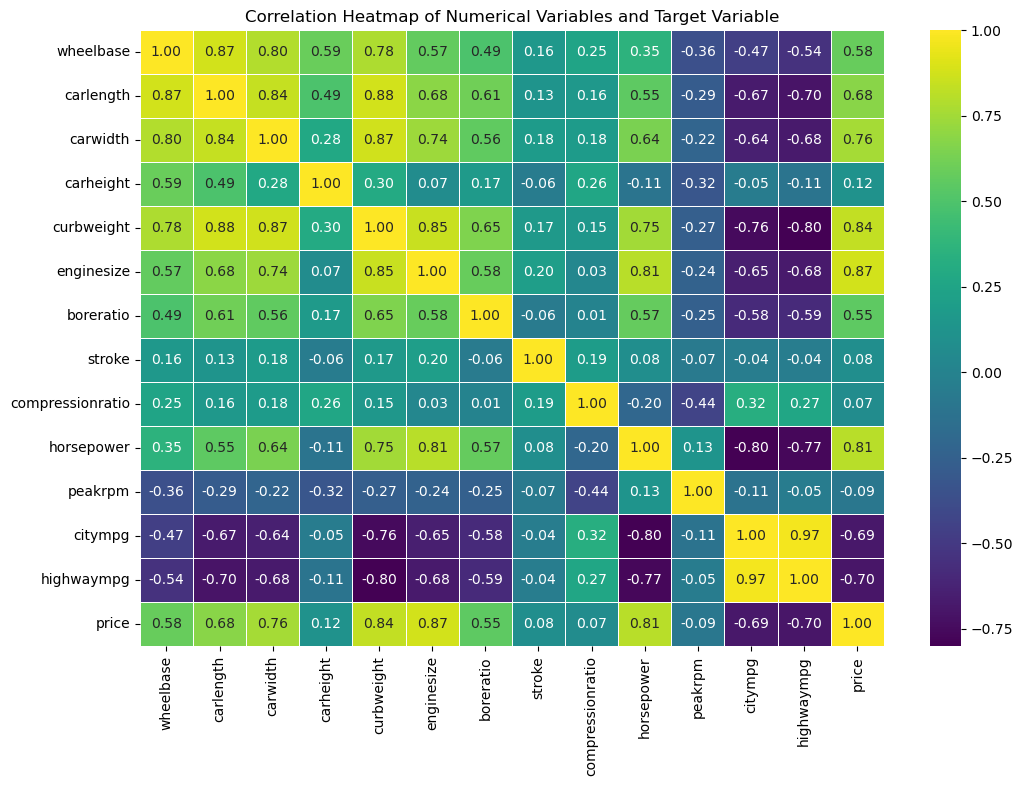

In [31]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

<Axes: xlabel='wheelbase', ylabel='carlength'>

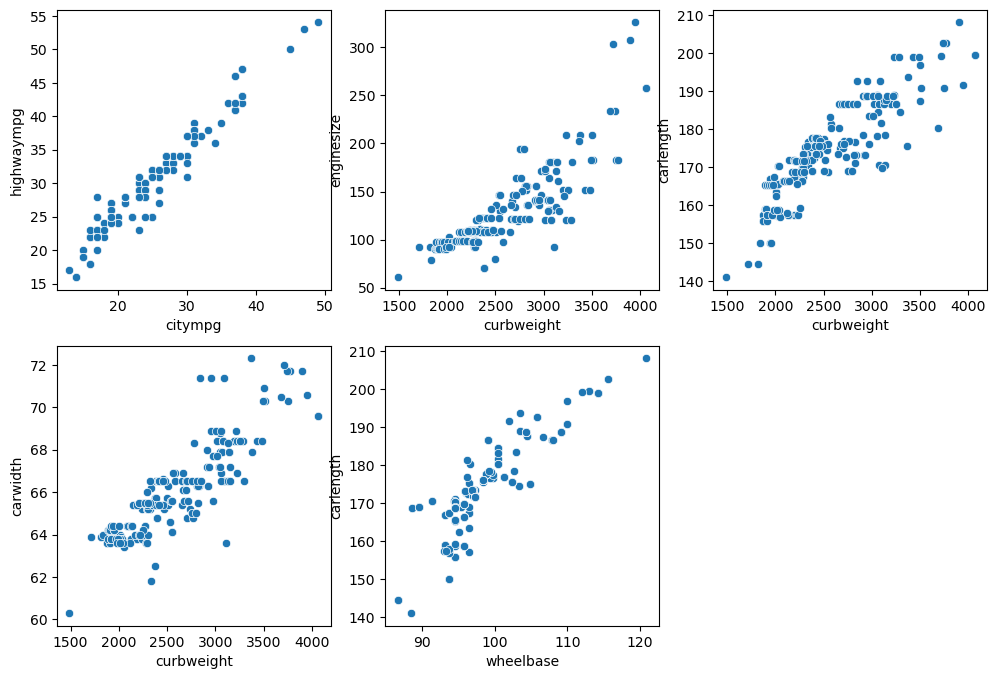

In [32]:
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
sns.scatterplot(data=df,x='citympg',y='highwaympg')

plt.subplot(2,3,2)
sns.scatterplot(data=df,x='curbweight',y='enginesize')

plt.subplot(2,3,3)
sns.scatterplot(data=df,x='curbweight',y='carlength')

plt.subplot(2,3,4)
sns.scatterplot(data=df,x='curbweight',y='carwidth')

plt.subplot(2,3,5)
sns.scatterplot(data=df,x='wheelbase',y='carlength')

In [33]:
df1 = df.copy()

In [34]:
df1.drop(['highwaympg','curbweight','wheelbase'],axis=1,inplace=True)

In [35]:
#dropping company name
df1.drop(['CompanyName'],axis=1,inplace=True)

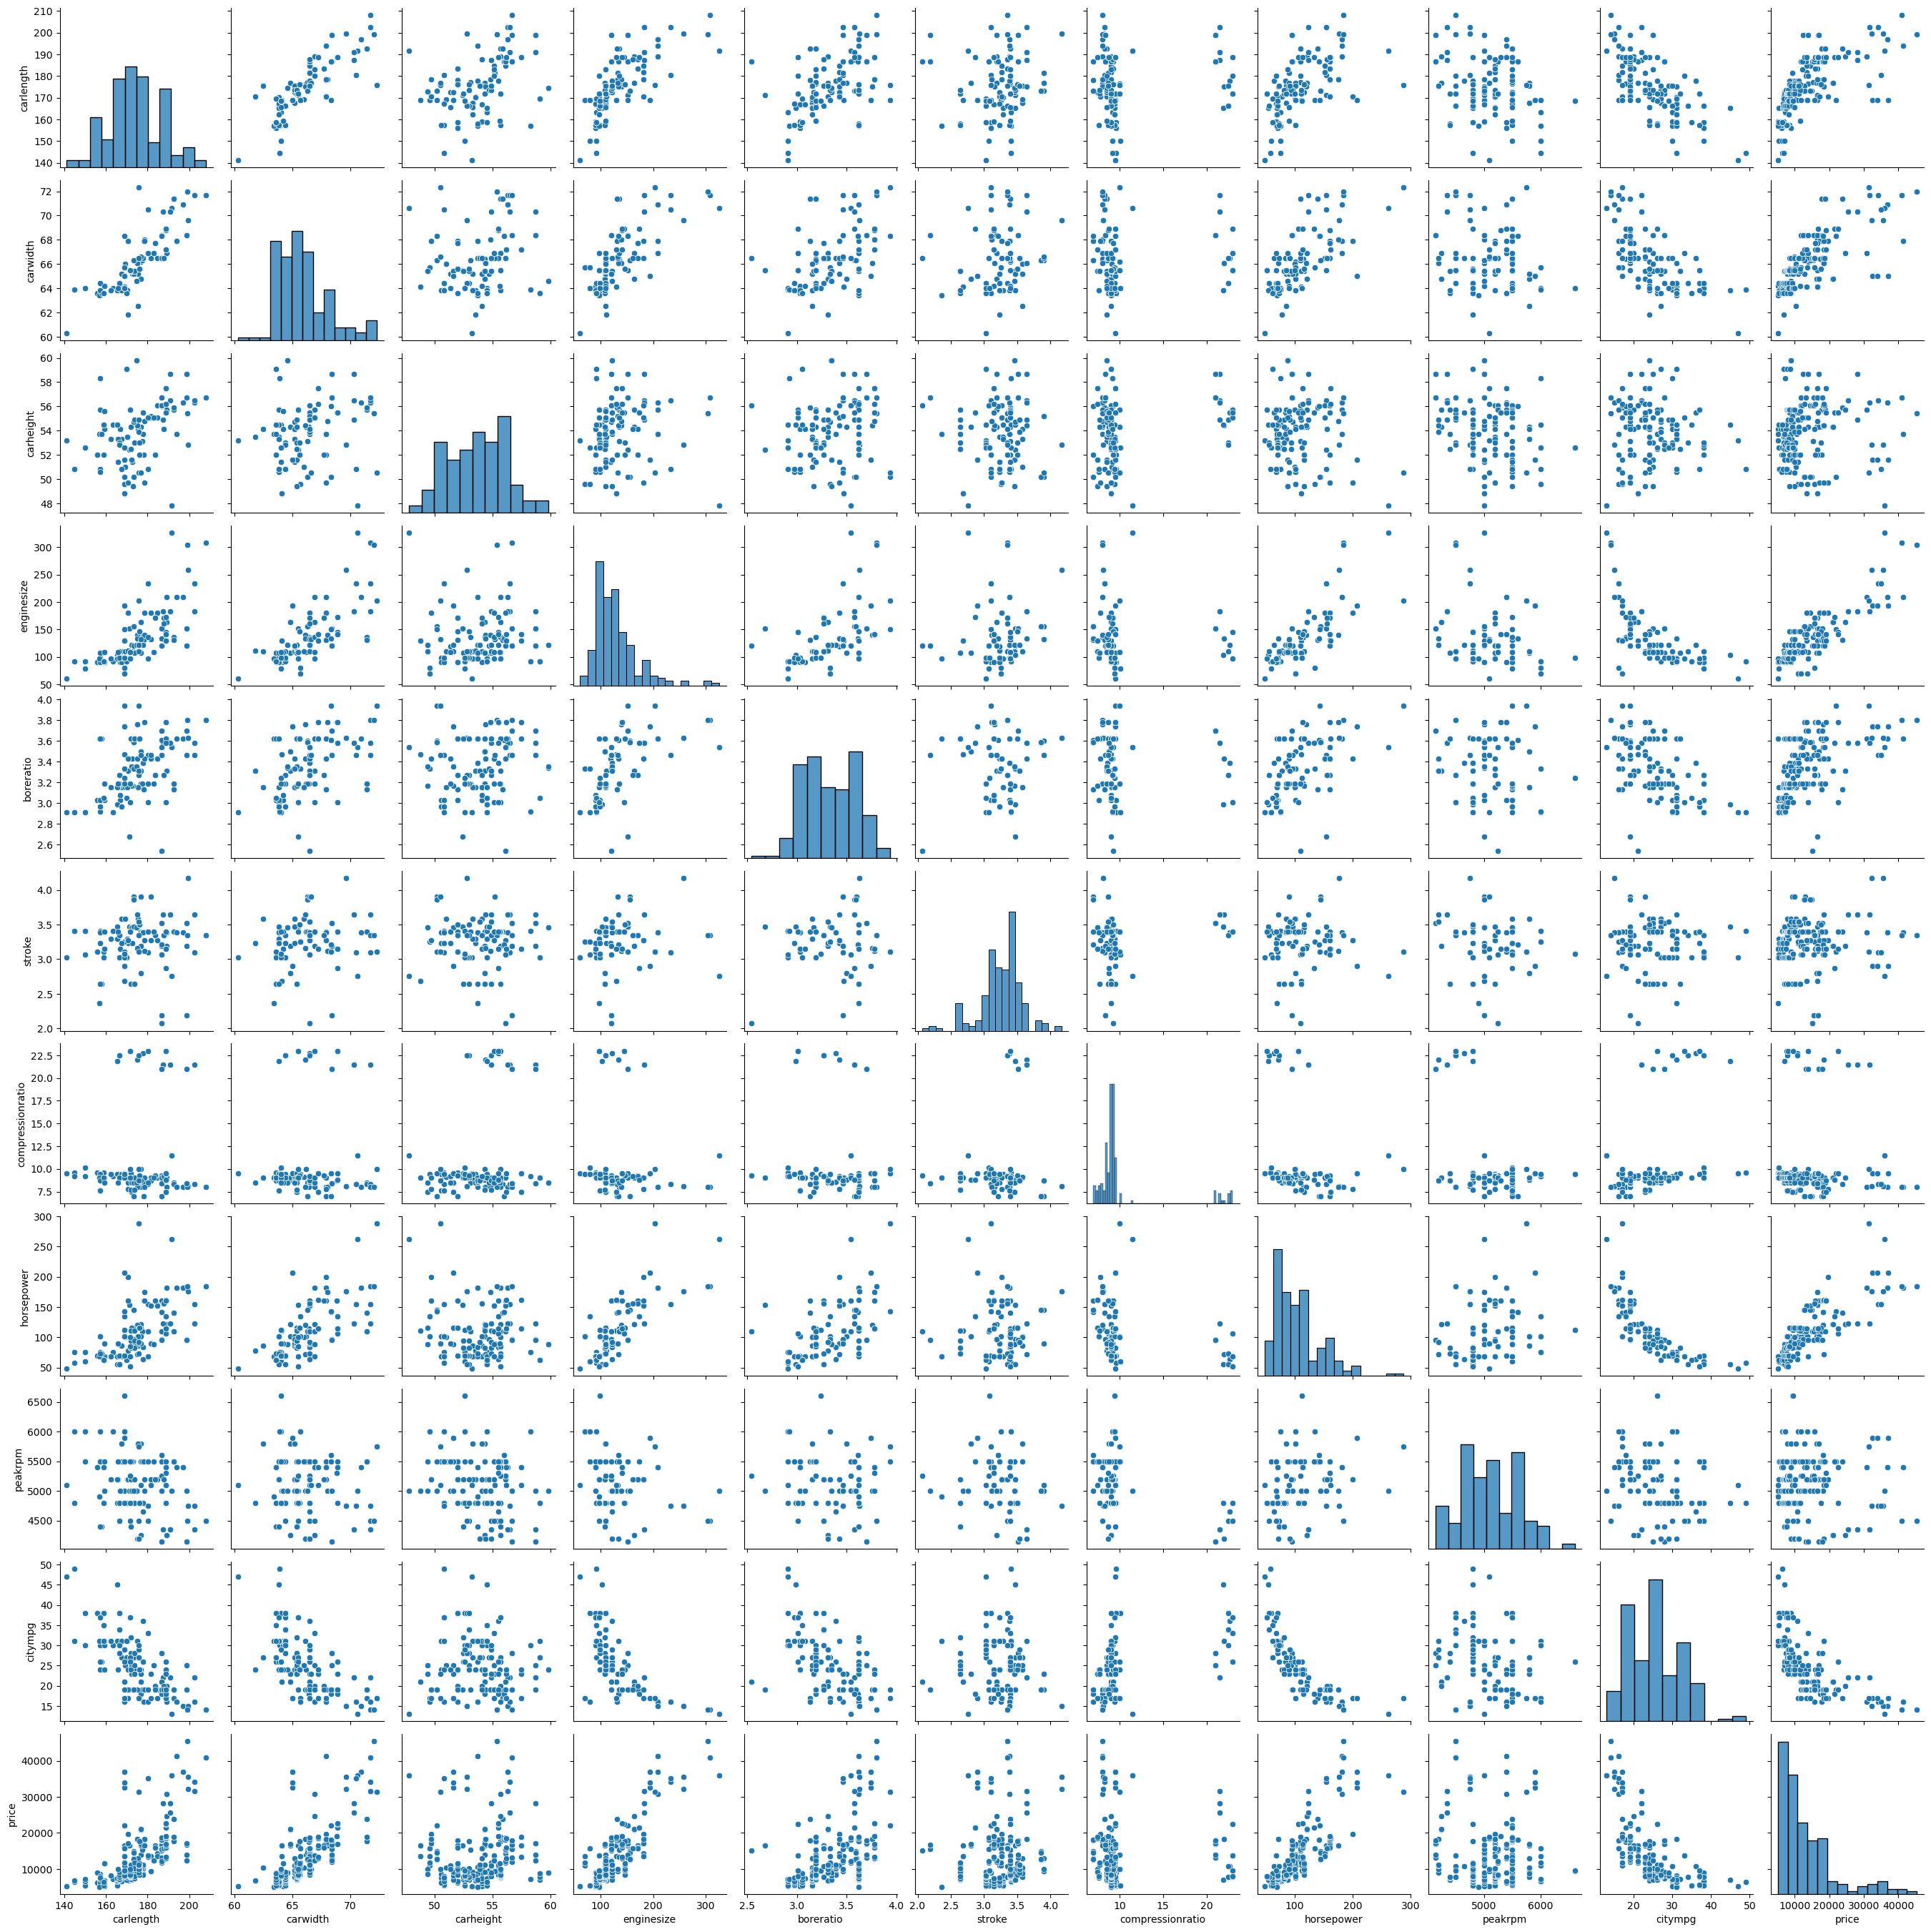

In [41]:
#pairwise scatter plot and observe linear relationships.
    
# Select only numerical variables
numerical_vars = df1.select_dtypes(include=['int64', 'float64'])

# Plot pair plot
sns.pairplot(numerical_vars)
plt.show()

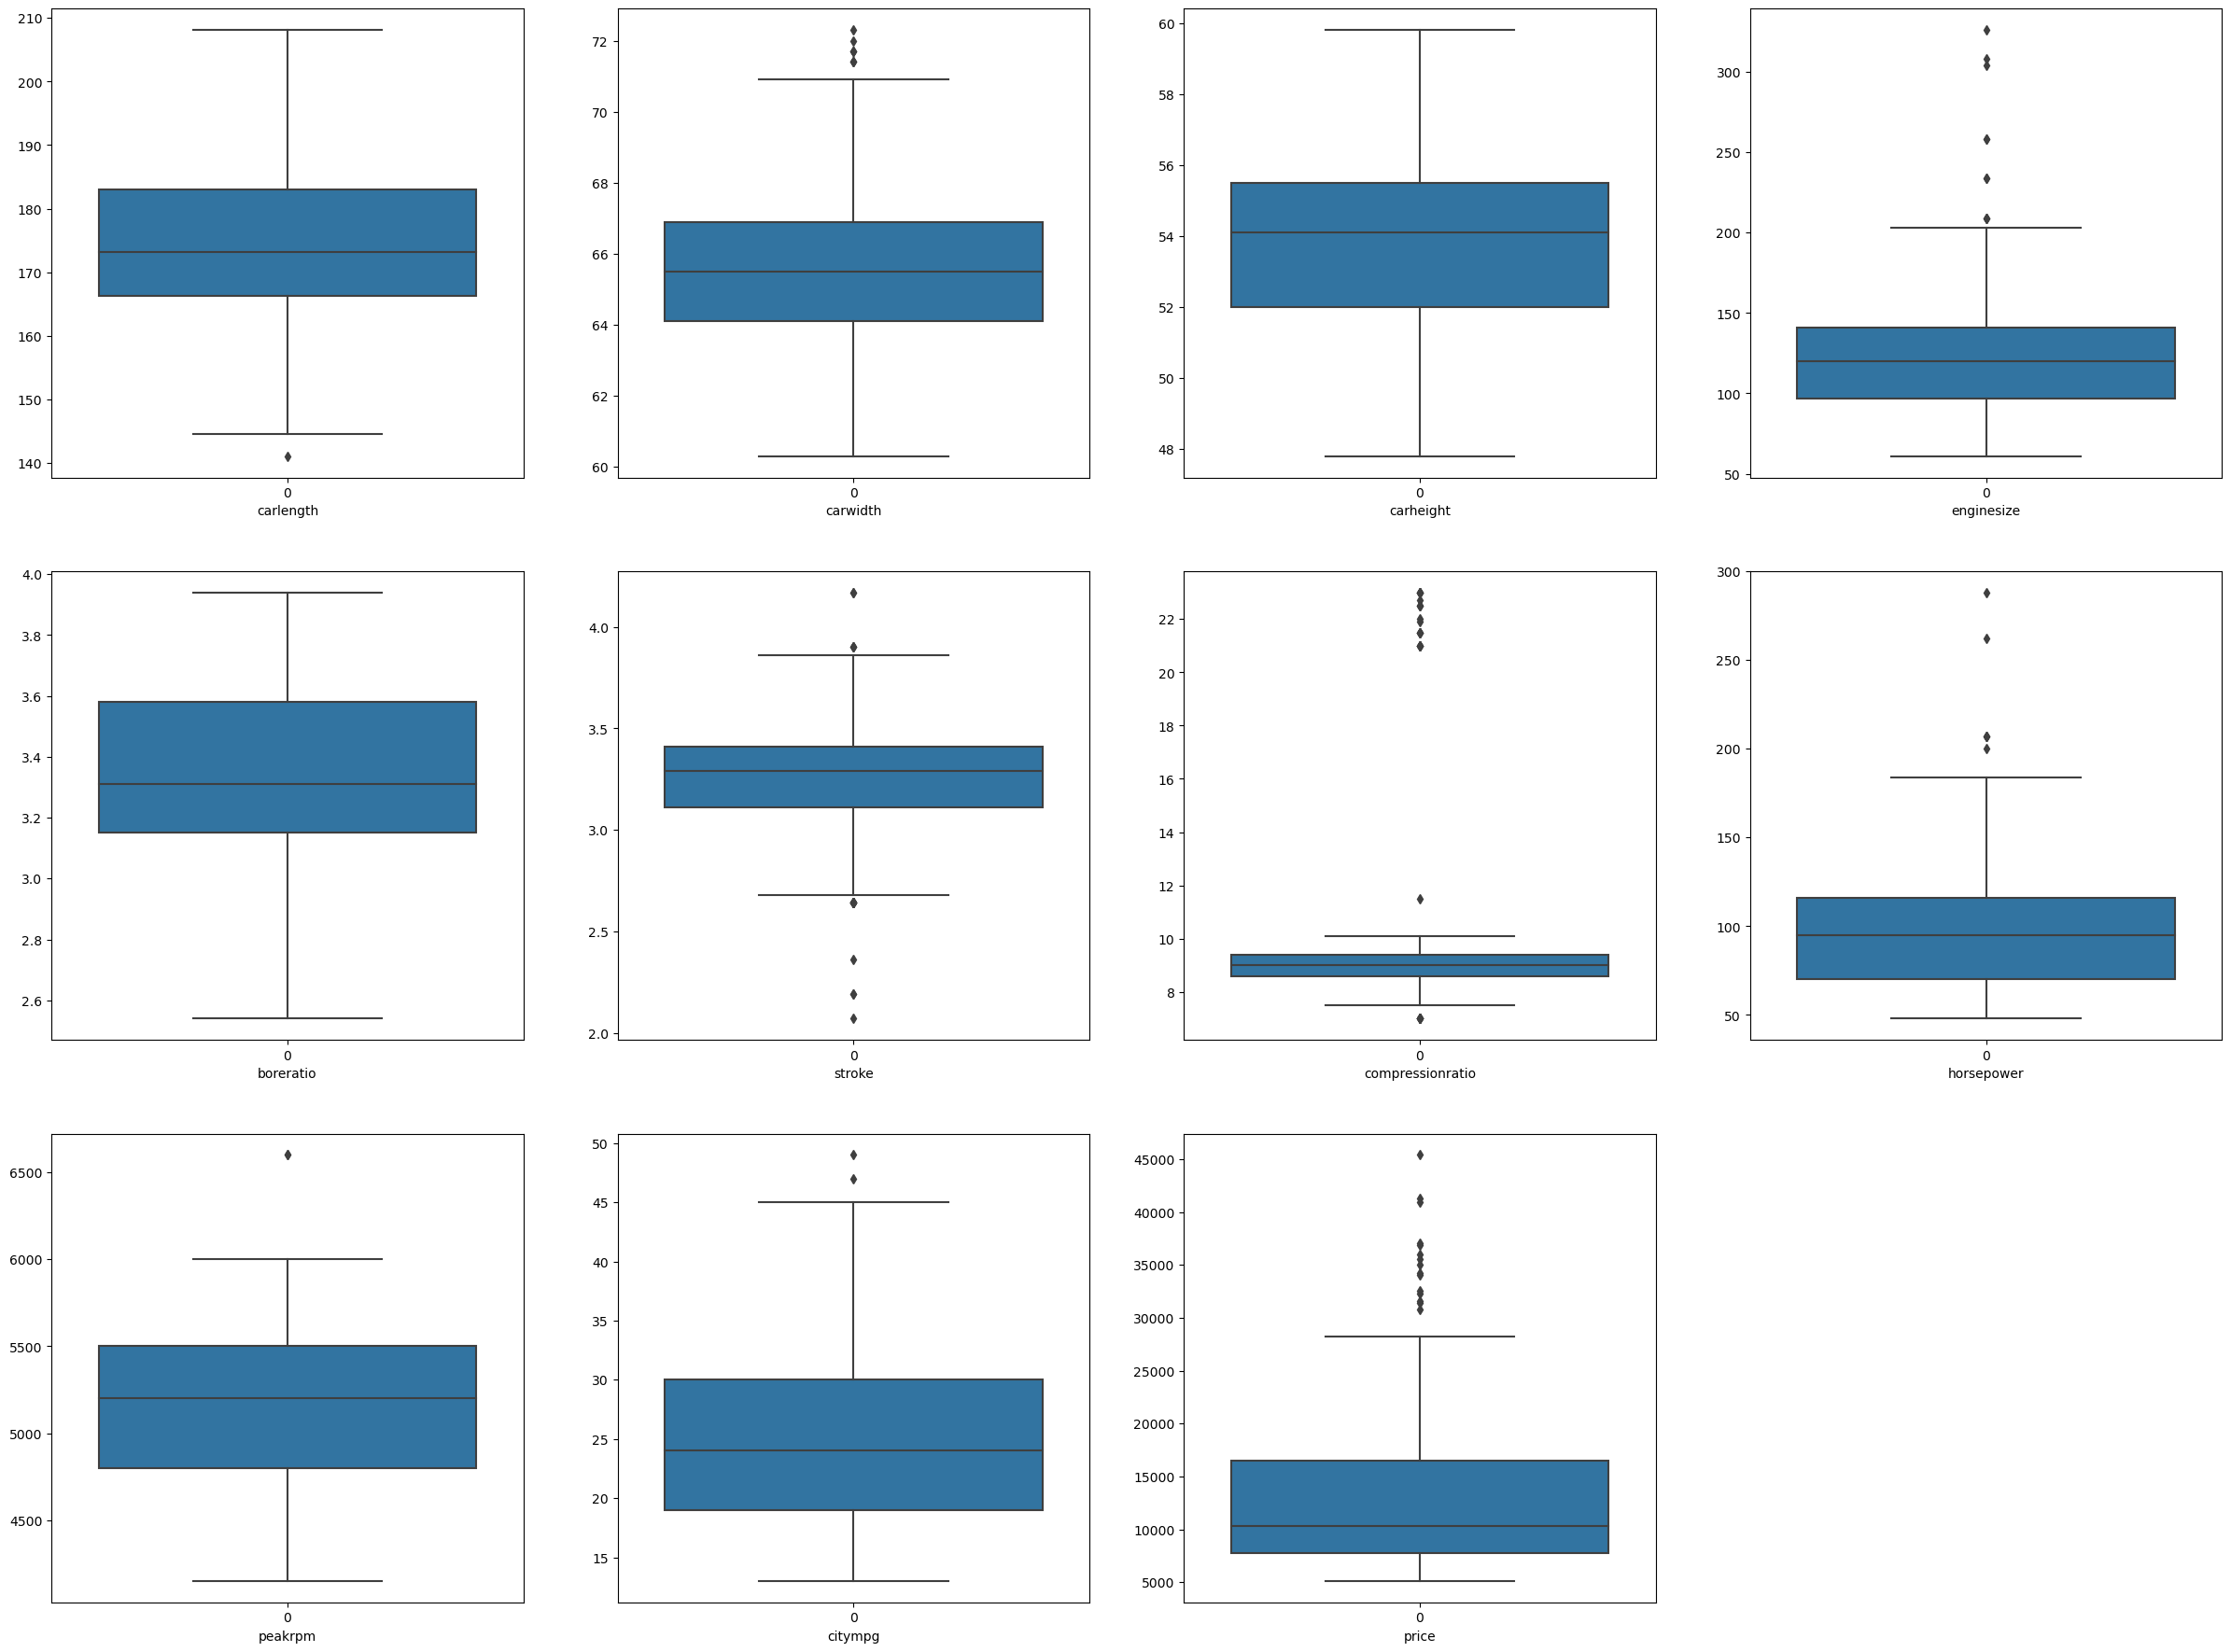

In [43]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

In [45]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [46]:
for i in df1.select_dtypes(include="number").columns:
    lw,uw=whisker(df1[i])
    df1[i]=np.where(df1[i]<lw,lw,df1[i])
    df1[i]=np.where(df1[i]>uw,uw,df1[i])   

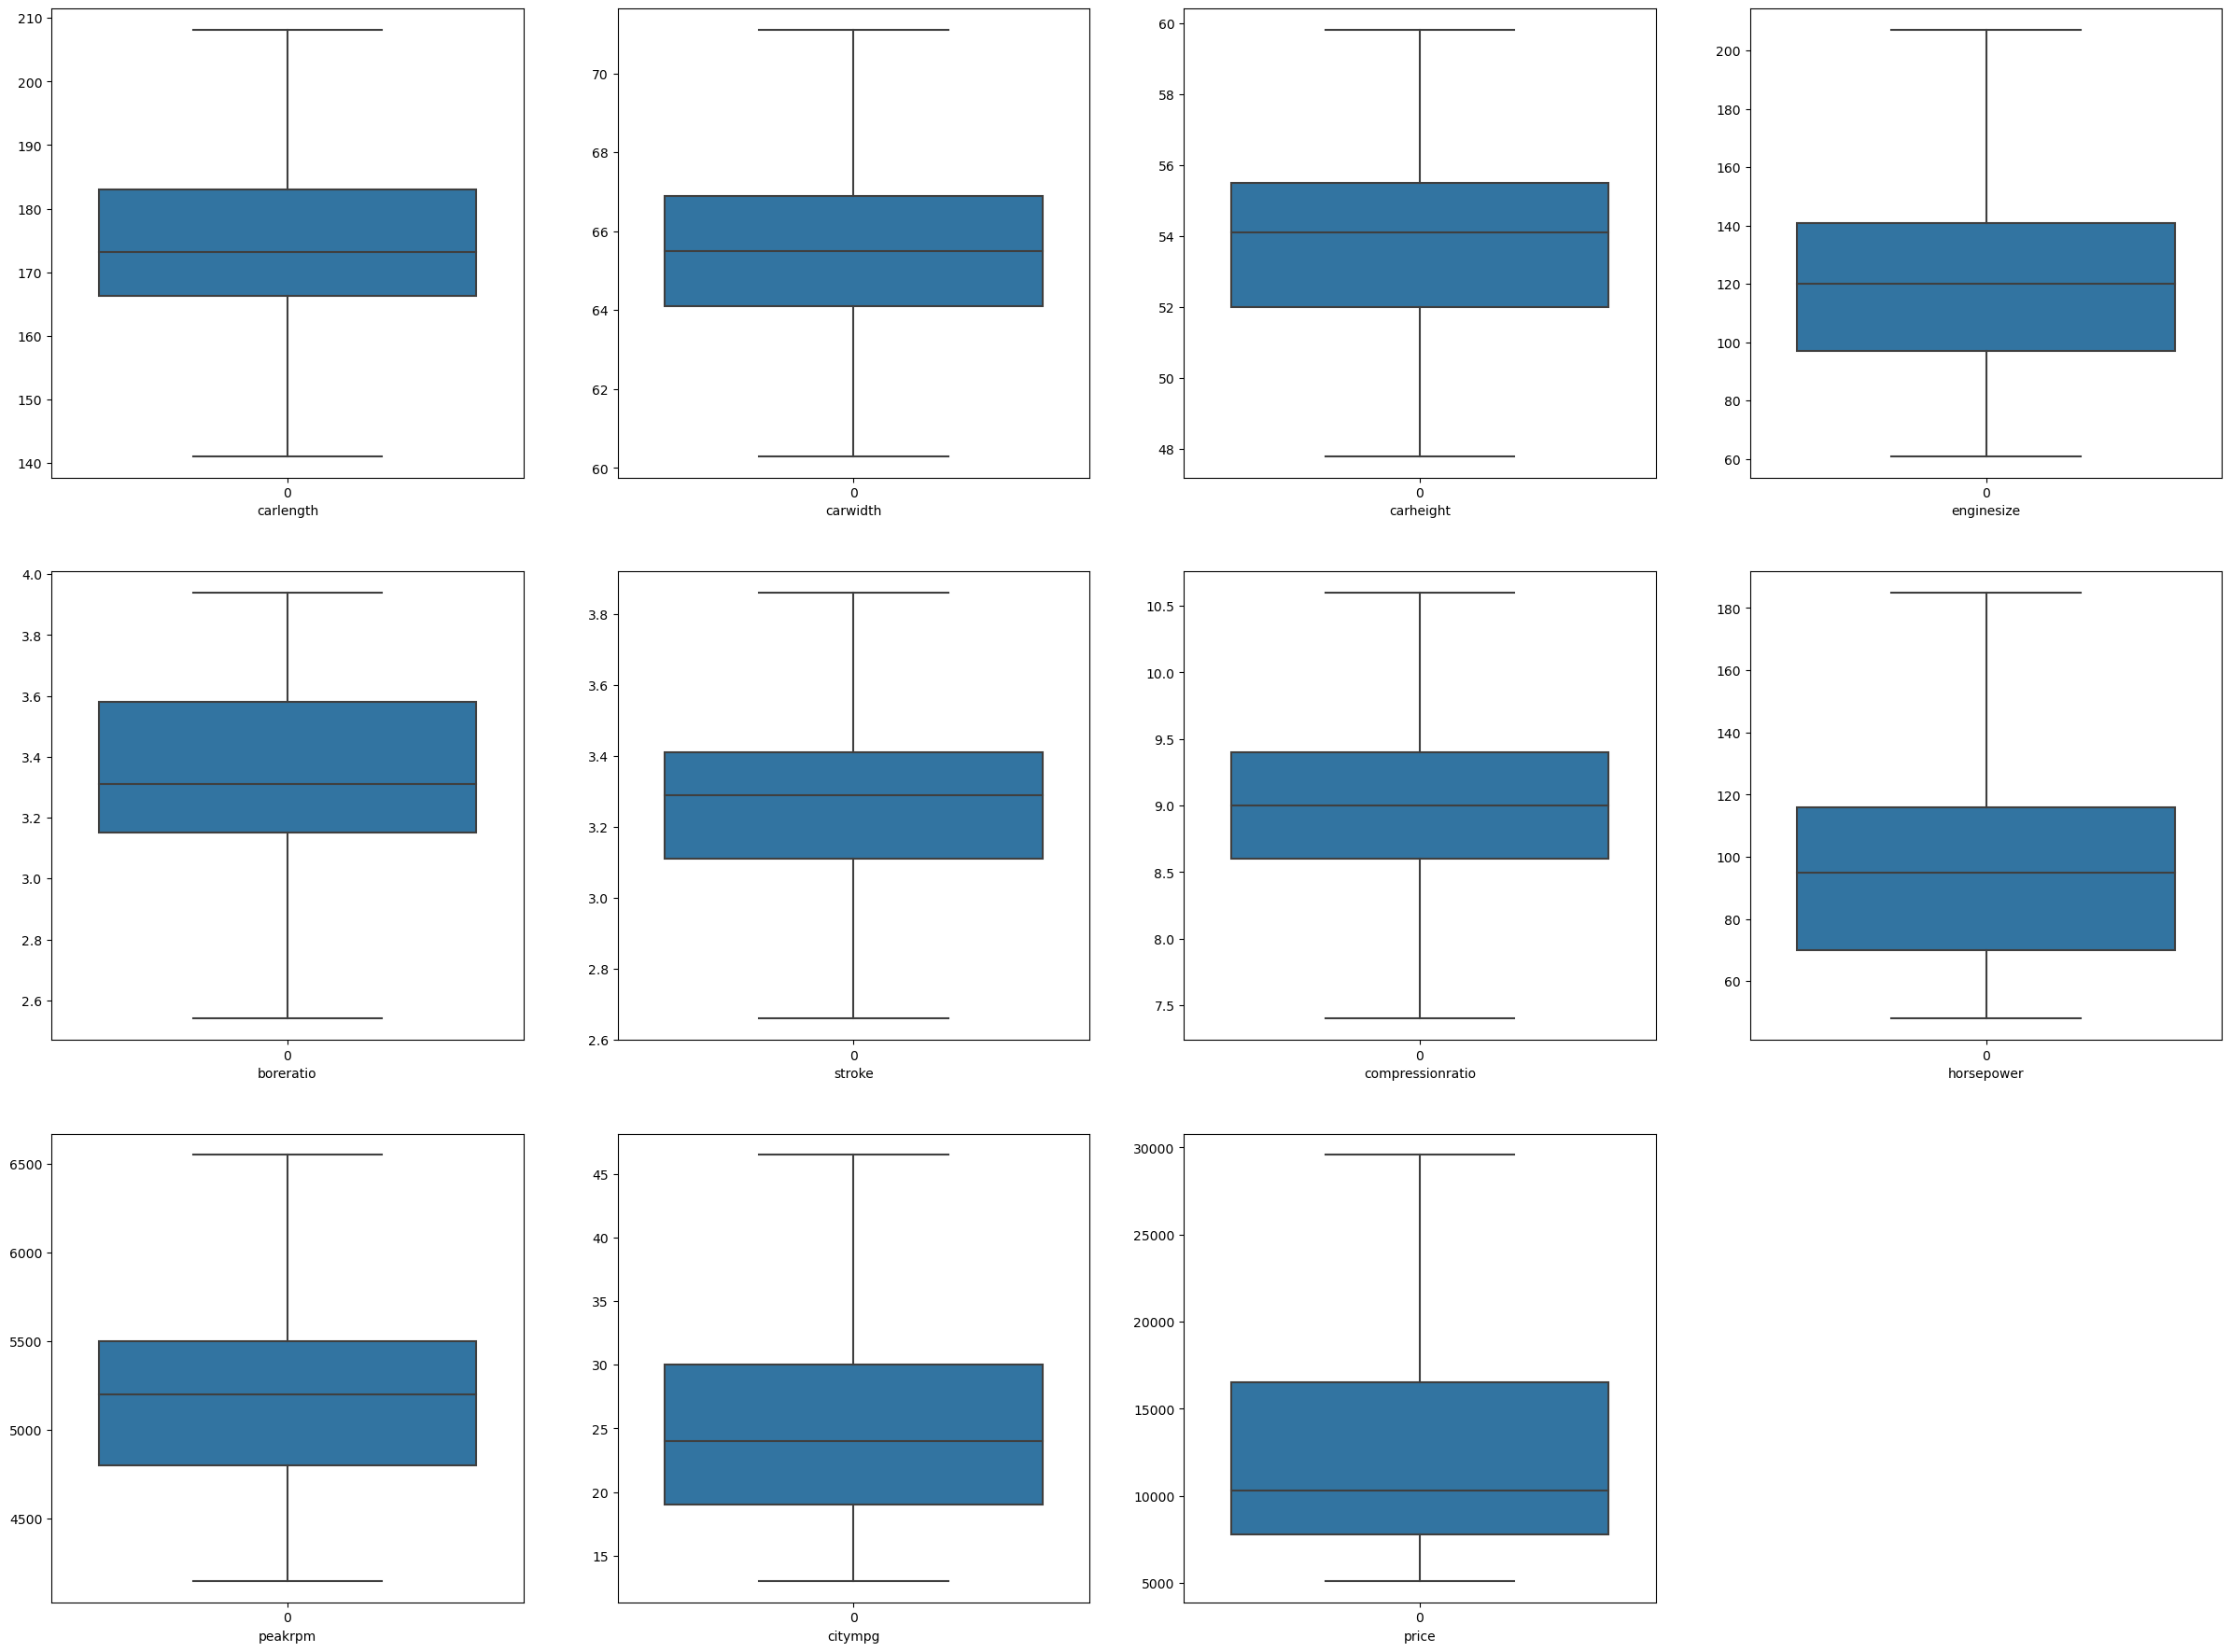

In [47]:
#box plot after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

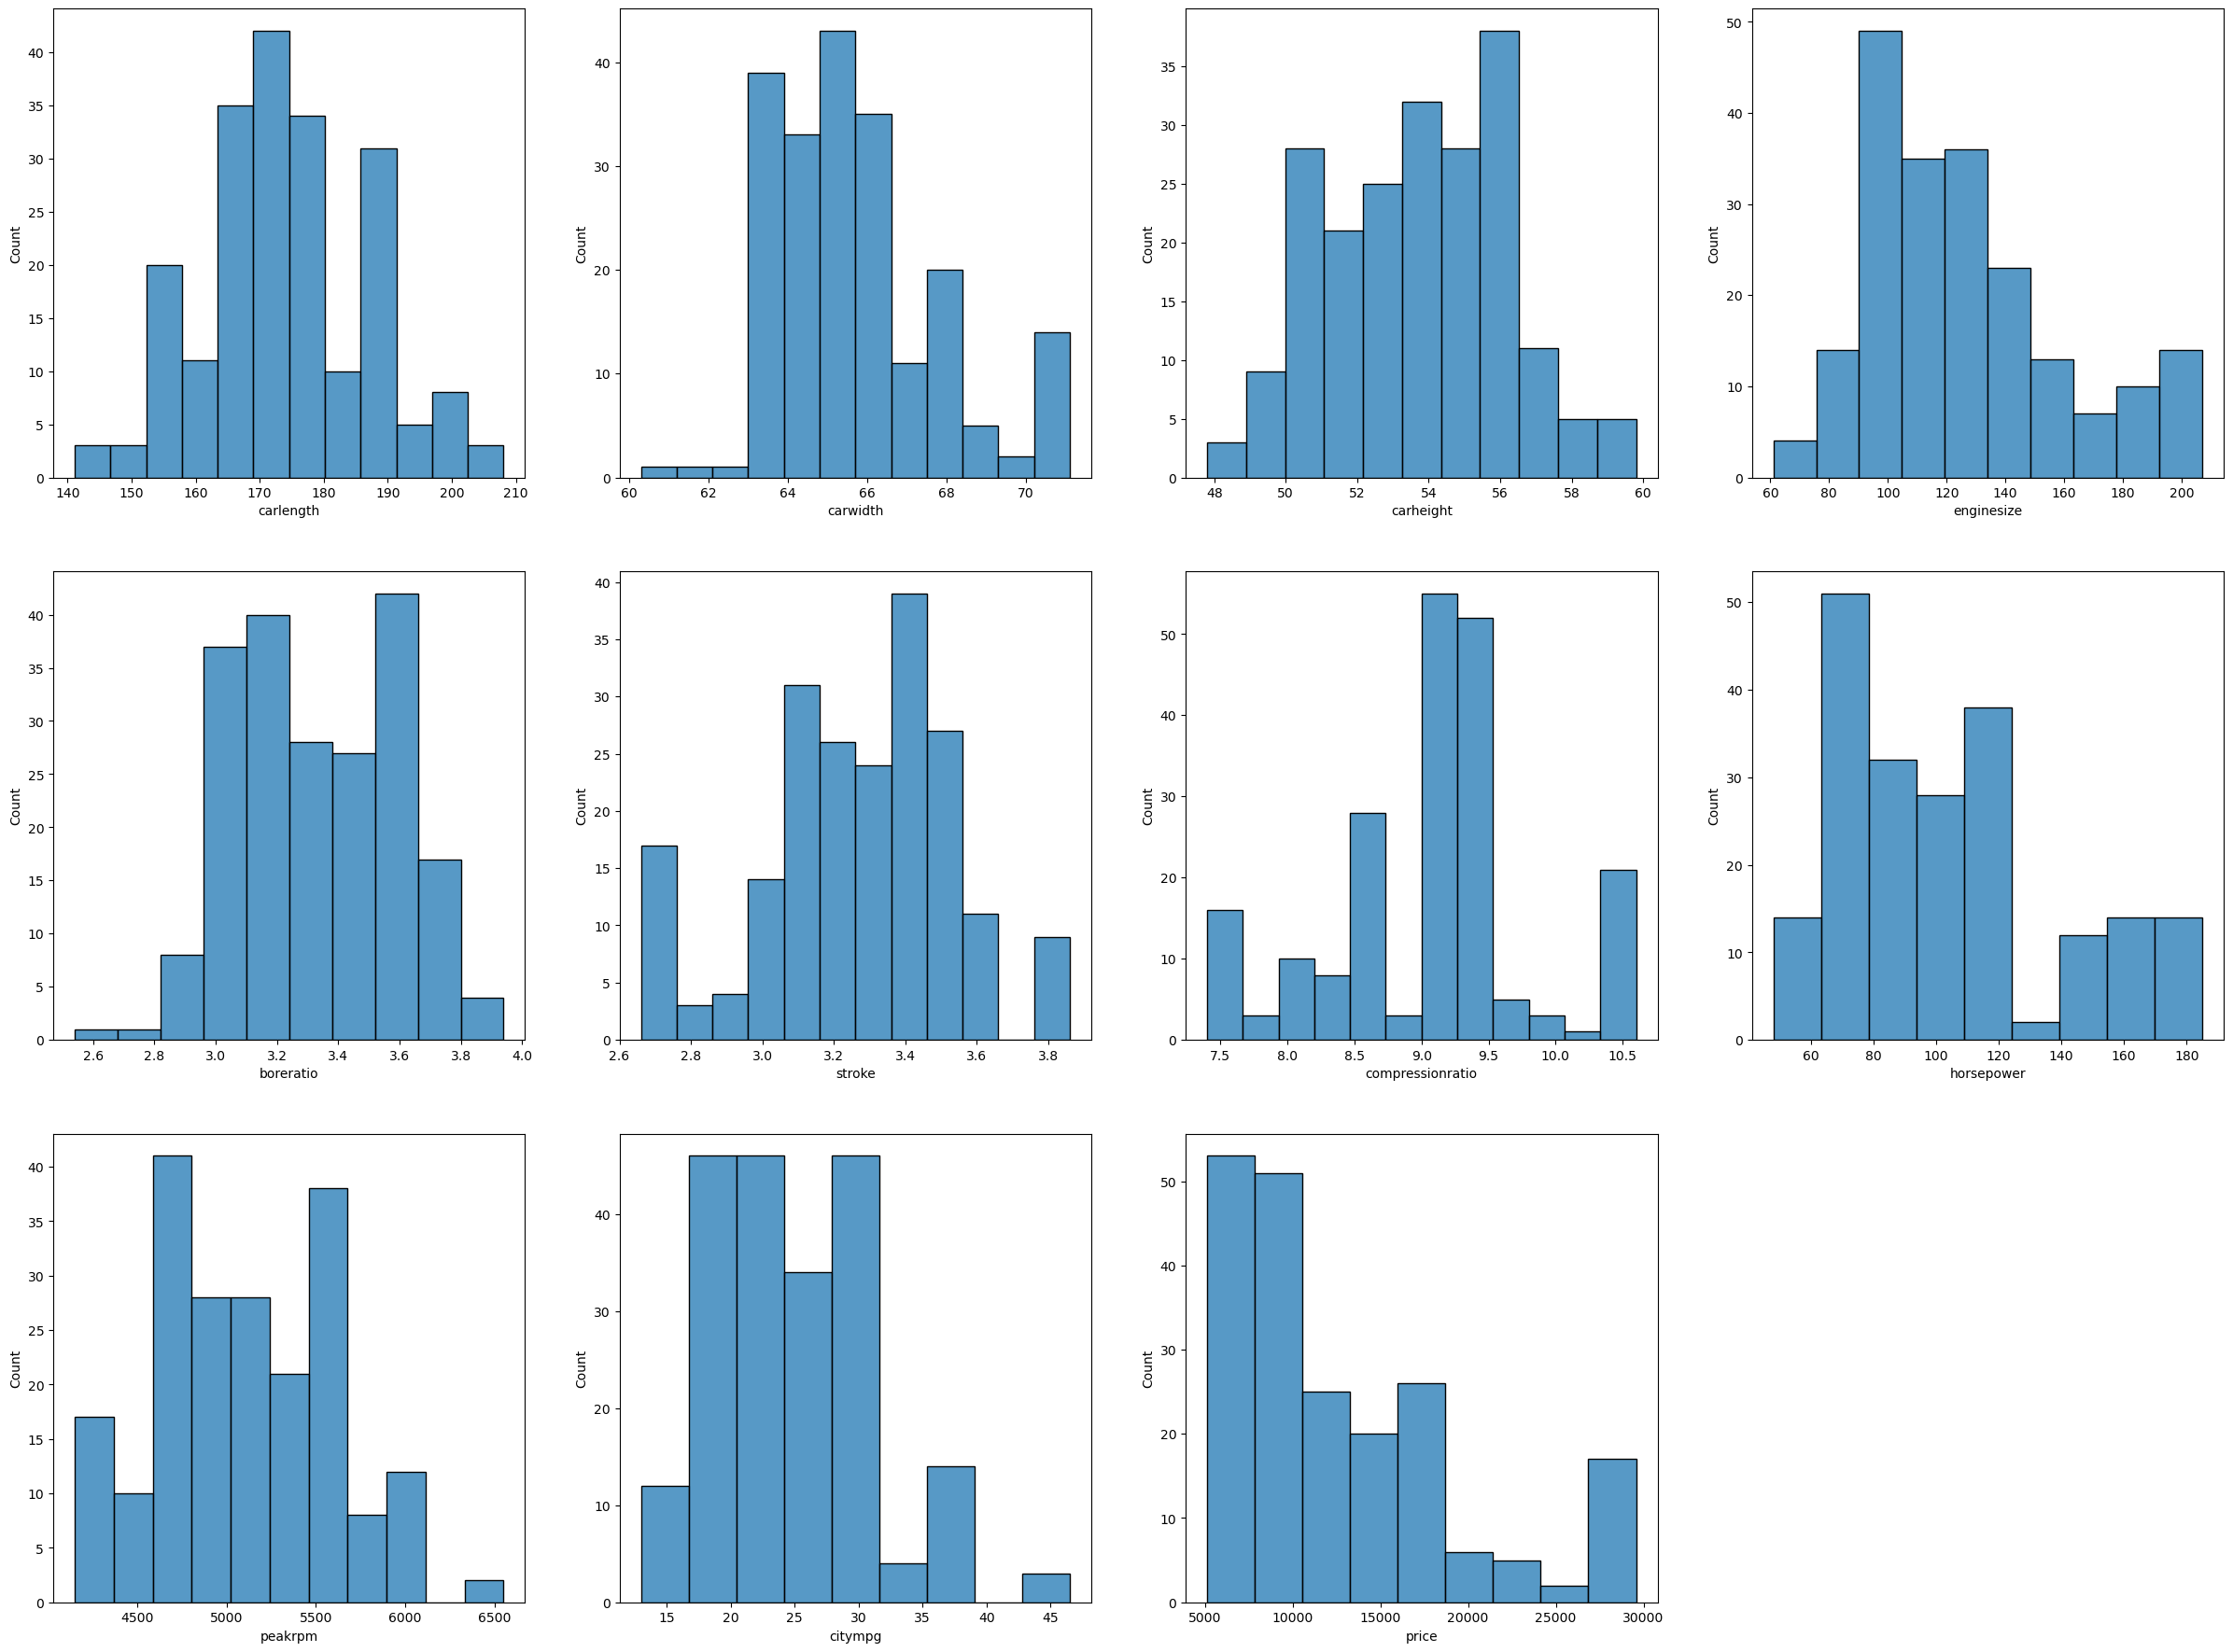

In [49]:
# To see the distribution of data after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.histplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

In [50]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

cols_to_encode = list(df1.select_dtypes(include=['object']))
cols_to_encode


#label_encoder is the object of LabelEncode
label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
df_label = df1.copy()

# Encode each column in cols_to_encode
for col in cols_to_encode:
    df_label[col] = label_encoder.fit_transform(df1[col])

print(df_label)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            5         1           0           1        0           2   
1            5         1           0           1        0           2   
2            3         1           0           1        2           2   
3            4         1           0           0        3           1   
4            4         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200          0         1           0           0        3           2   
201          0         1           1           0        3           2   
202          0         1           0           0        3           2   
203          0         0           1           0        3           2   
204          0         1           1           0        3           2   

     enginelocation  carlength  carwidth  carheight  ...  cylindernumber  \
0                 0      168.8      64.1       

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_columns = ['carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df[numerical_columns])

# Transform the data
scaled_data = scaler.transform(df[numerical_columns])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Initialize a new DataFrame to store after applying MinMaxScaler
df_car = df_label.copy()

# Replace scaled columns in the original DataFrame
df_car[numerical_columns] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_car)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            5         1           0           1        0           2   
1            5         1           0           1        0           2   
2            3         1           0           1        2           2   
3            4         1           0           0        3           1   
4            4         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200          0         1           0           0        3           2   
201          0         1           1           0        3           2   
202          0         1           0           0        3           2   
203          0         0           1           0        3           2   
204          0         1           1           0        3           2   

     enginelocation  carlength  carwidth  carheight  ...  cylindernumber  \
0                 0   0.413433  0.316667   0.08

In [52]:
df_car

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,5,1,0,1,0,2,0,0.413433,0.316667,0.083333,...,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.207959
1,5,1,0,1,0,2,0,0.413433,0.316667,0.083333,...,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.282558
2,3,1,0,1,2,2,0,0.449254,0.433333,0.383333,...,3,0.343396,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.282558
3,4,1,0,0,3,1,0,0.529851,0.491667,0.541667,...,2,0.181132,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.219254
4,4,1,0,0,3,0,0,0.529851,0.508333,0.541667,...,1,0.283019,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,3,2,0,0.711940,0.716667,0.641667,...,2,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.291123
201,0,1,1,0,3,2,0,0.711940,0.708333,0.641667,...,2,0.301887,5,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.345738
202,0,1,0,0,3,2,0,0.711940,0.716667,0.641667,...,3,0.422642,5,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.406311
203,0,0,1,0,3,2,0,0.711940,0.716667,0.641667,...,3,0.316981,3,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.430763


In [53]:
# Split dataset into features and target variable
x = df_car.drop('price', axis=1)
y = df_car['price']

In [54]:
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
0,5,1,0,1,0,2,0,0.413433,0.316667,0.083333,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222
1,5,1,0,1,0,2,0,0.413433,0.316667,0.083333,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222
2,3,1,0,1,2,2,0,0.449254,0.433333,0.383333,5,3,0.343396,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667
3,4,1,0,0,3,1,0,0.529851,0.491667,0.541667,3,2,0.181132,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556
4,4,1,0,0,3,0,0,0.529851,0.508333,0.541667,3,1,0.283019,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,3,2,0,0.711940,0.716667,0.641667,3,2,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778
201,0,1,1,0,3,2,0,0.711940,0.708333,0.641667,3,2,0.301887,5,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667
202,0,1,0,0,3,2,0,0.711940,0.716667,0.641667,5,3,0.422642,5,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889
203,0,0,1,0,3,2,0,0.711940,0.716667,0.641667,3,3,0.316981,3,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111


In [55]:
y

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

In [56]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression()

In [58]:
#Train the model with the provided training data
LinearModel.fit(x_train,y_train)


LinearRegression()

In [59]:
Linear_PredictedTest = LinearModel.predict(x_test)
Linear_PredictedTest

array([ 0.49501423,  0.26302121,  0.13348669,  0.20418503,  0.49412497,
        0.02702604,  0.08155806,  0.05831696,  0.11512802,  0.06371071,
        0.28290807,  0.07026529,  0.26101063,  0.13250959,  0.85902857,
        0.05124946, -0.21840621,  0.22801887,  0.12800355,  0.1307993 ,
        0.15889223,  0.389047  ,  0.0519155 , -0.09147876,  0.03477603,
        0.47130162,  0.22864016,  0.28125972,  0.01537915,  0.29844195,
        0.50552141,  0.05781364,  0.00777363,  0.47690878,  0.07583977,
        0.51149662,  0.10977433,  0.10970146,  0.0013134 ,  0.22743282,
        0.08663611])

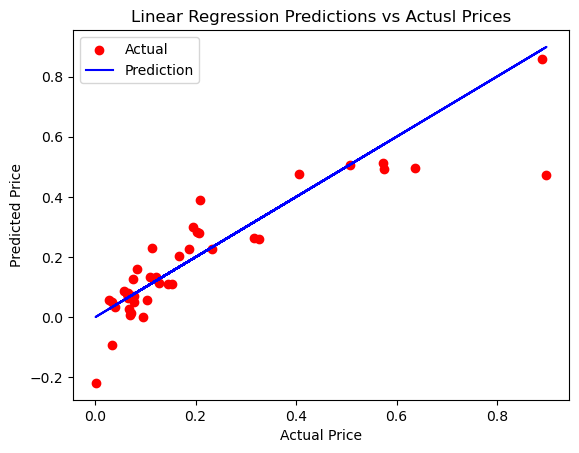

In [60]:
#Plot the actual target variable against the predicted values
plt.scatter(y_test, Linear_PredictedTest, color='red',label='Actual')
plt.plot(y_test,y_test,color='blue',label='Prediction') # Plot the prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Predictions vs Actusl Prices')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('Linear Regression')
MAE = mean_absolute_error(y_test,Linear_PredictedTest)
MSE = mean_absolute_error(y_test,Linear_PredictedTest)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,Linear_PredictedTest)
print("Mean Absolute Error(MAE):",MAE)
print("Mean Squared Error(MSE):",MSE)
print ("rmse:",RMSE)
print("R Squared:",r2)

Linear Regression
Mean Absolute Error(MAE): 0.06378864380409809
Mean Squared Error(MSE): 0.06378864380409809
rmse: 0.25256413800082167
R Squared: 0.8012551509578858


In [63]:
# lr.score(x_test, y_test) calculates the R-squared score on the test data .
LinearModel.score(x_test,y_test)


0.8012551509578858

In [64]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearModel,x_train,y_train,cv=5)

In [65]:
scores

array([0.82239051, 0.8916624 , 0.84729627, 0.84863143, 0.85878785])

In [66]:
scores.mean()

0.8537536926553482

In [67]:
from sklearn.tree import DecisionTreeRegressor

#creating object for DecisionTree Regression class
DecisionTree = DecisionTreeRegressor(random_state=42)

In [68]:
#training the model with the provided training data
DecisionTree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [69]:
Decision_PredictedTest = DecisionTree.predict(x_test)
Decision_PredictedTest

array([0.78849114, 0.32351919, 0.09510451, 0.21652351, 0.65741522,
       0.03125465, 0.00570975, 0.08011022, 0.10329676, 0.07142148,
       0.25152674, 0.07298545, 0.18981183, 0.15217715, 1.        ,
       0.03028648, 0.01127054, 0.24206842, 0.04644754, 0.10329676,
       0.12727769, 0.20805819, 0.03125465, 0.00570975, 0.06183903,
       0.78849114, 0.11682637, 0.28293034, 0.05538454, 0.2697731 ,
       0.65741522, 0.02758056, 0.09085944, 0.29112259, 0.07047813,
       0.65246264, 0.10329676, 0.18934015, 0.0942977 , 0.24206842,
       0.07186833])

In [70]:
Decision_PredictedTest = DecisionTree.predict(x_test)
Decision_PredictedTest

array([0.78849114, 0.32351919, 0.09510451, 0.21652351, 0.65741522,
       0.03125465, 0.00570975, 0.08011022, 0.10329676, 0.07142148,
       0.25152674, 0.07298545, 0.18981183, 0.15217715, 1.        ,
       0.03028648, 0.01127054, 0.24206842, 0.04644754, 0.10329676,
       0.12727769, 0.20805819, 0.03125465, 0.00570975, 0.06183903,
       0.78849114, 0.11682637, 0.28293034, 0.05538454, 0.2697731 ,
       0.65741522, 0.02758056, 0.09085944, 0.29112259, 0.07047813,
       0.65246264, 0.10329676, 0.18934015, 0.0942977 , 0.24206842,
       0.07186833])

In [71]:
print("Decision Tree Regressor:")
mae=mean_absolute_error(y_test, Decision_PredictedTest)
mse=mean_squared_error(y_test, Decision_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Decision_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Decision Tree Regressor:
Mean Absolute Error(MAE): 0.044300688075894205
Mean Squared Error(MSE): 0.003760117439847213
rmse: 0.061319796475911535
R Squared: 0.9227133973568609


In [72]:
DecisionTree.score(x_test,y_test)

0.9227133973568609

In [73]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTree,x_train,y_train, cv=5)

In [74]:
scores

array([0.8175367 , 0.80361296, 0.55257651, 0.90095166, 0.85080316])

In [75]:
scores.mean()

0.785096197877737

In [76]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
Random_PredictedTest=random_forest.predict(x_test)
Random_PredictedTest

array([0.77517824, 0.33998076, 0.11405615, 0.22912649, 0.54991448,
       0.03218993, 0.06099374, 0.07217839, 0.15235167, 0.07169968,
       0.28487811, 0.05917929, 0.26506893, 0.144462  , 0.85620476,
       0.02772694, 0.01001787, 0.22959635, 0.06569634, 0.13761614,
       0.1311249 , 0.24657846, 0.03189646, 0.01702981, 0.05351286,
       0.77431769, 0.12497543, 0.28435281, 0.05538835, 0.28292885,
       0.55563395, 0.03176315, 0.08131771, 0.3501456 , 0.07337992,
       0.54590127, 0.15299613, 0.19207231, 0.06731518, 0.22959635,
       0.08612259])

In [78]:
print("Random Forest:")
mae=mean_absolute_error(y_test, Random_PredictedTest)
mse=mean_squared_error(y_test, Random_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Random_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Random Forest:
Mean Absolute Error(MAE): 0.03430506315493195
Mean Squared Error(MSE): 0.002156935333968973
rmse: 0.046442817894363095
R Squared: 0.955665692162482


In [79]:
random_forest.score(x_test,y_test)

0.955665692162482

In [80]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTree,x_train,y_train,cv=5)
scores

array([0.8175367 , 0.80361296, 0.55257651, 0.90095166, 0.85080316])

In [81]:
scores.mean()

0.785096197877737

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoosting = GradientBoostingRegressor(random_state=42)
GradientBoosting.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [83]:
Gradient_PredictedTest=GradientBoosting.predict(x_test)
Gradient_PredictedTest

array([ 0.77694596,  0.33467504,  0.10146861,  0.22449502,  0.66592798,
        0.04251996,  0.06120096,  0.05750125,  0.12743437,  0.06834895,
        0.28883811,  0.07052705,  0.29565266,  0.14308511,  0.95426734,
        0.02987326, -0.01329956,  0.21053252,  0.0566461 ,  0.11429854,
        0.12562659,  0.25051637,  0.02245817,  0.01504335,  0.03722484,
        0.77730918,  0.13272431,  0.28939339,  0.05078274,  0.28939339,
        0.67180226,  0.03523445,  0.07804115,  0.39844691,  0.0822764 ,
        0.63173059,  0.15149355,  0.19181364,  0.05595142,  0.21053252,
        0.08423005])

In [84]:
Gradient_PredictedTest=GradientBoosting.predict(x_test)
Gradient_PredictedTest

array([ 0.77694596,  0.33467504,  0.10146861,  0.22449502,  0.66592798,
        0.04251996,  0.06120096,  0.05750125,  0.12743437,  0.06834895,
        0.28883811,  0.07052705,  0.29565266,  0.14308511,  0.95426734,
        0.02987326, -0.01329956,  0.21053252,  0.0566461 ,  0.11429854,
        0.12562659,  0.25051637,  0.02245817,  0.01504335,  0.03722484,
        0.77730918,  0.13272431,  0.28939339,  0.05078274,  0.28939339,
        0.67180226,  0.03523445,  0.07804115,  0.39844691,  0.0822764 ,
        0.63173059,  0.15149355,  0.19181364,  0.05595142,  0.21053252,
        0.08423005])

In [85]:
GradientBoosting.score(x_test,y_test)

0.9382031777491971

In [86]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(GradientBoosting,x_train,y_train,cv=5)
scores

array([0.90816122, 0.93293351, 0.84210487, 0.92870435, 0.890541  ])

In [87]:
scores.mean()

0.9004889905876826

In [88]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [89]:
svr_PredictedTest = svr_model.predict(x_test)
svr_PredictedTest

array([0.42284814, 0.28964647, 0.12294396, 0.21980548, 0.44559637,
       0.06528287, 0.12471098, 0.09232606, 0.18770598, 0.06519305,
       0.25539087, 0.11652752, 0.29853779, 0.22791084, 0.6992159 ,
       0.07083286, 0.06381934, 0.25061486, 0.11037597, 0.19838656,
       0.13429256, 0.32473748, 0.10705812, 0.06701176, 0.05901283,
       0.42197696, 0.29836855, 0.29809519, 0.08135931, 0.31721013,
       0.47210345, 0.07493544, 0.07447041, 0.44045867, 0.14799897,
       0.46228629, 0.18033871, 0.26713122, 0.06353236, 0.2509182 ,
       0.14362866])

In [90]:
print("Support Vector Machine(SVM):")
mae=mean_absolute_error(y_test, svr_PredictedTest)
mse=mean_squared_error(y_test, svr_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,svr_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Support Vector Machine(SVM):
Mean Absolute Error(MAE): 0.07315355570019386
Mean Squared Error(MSE): 0.012073870695227315
rmse: 0.10988116624439019
R Squared: 0.7518299729423897


In [91]:
svr_model.score(x_test,y_test)

0.7518299729423897

In [92]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svr_model,x_train,y_train,cv=5)
scores

array([0.71582215, 0.71896075, 0.57881087, 0.68243805, 0.62784249])

In [93]:
scores.mean()

0.664774863057761

In [94]:
import pandas as pd

# Evaluation metrics result
evaluation_metrics = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest', 'Gradient Boosting Regressor', 'Support Vector Machine(SVM)'],
    'Mean Absolute Error (MAE)': [0.06378864380409804, 0.044300688075894205, 0.03430506315493195, 0.03842768977002852, 0.07315355570019393],
    'Mean Squared Error (MSE)': [0.009669256344642758, 0.003760117439847213, 0.002156935333968973, 0.003006514727336248, 0.012073870695227355],
    'Root Mean Squared Error (RMSE)': [0.0983323768890123, 0.061319796475911535, 0.046442817894363095, 0.054831694551019015, 0.10988116624439037],
    'R Squared (R^2)': [0.8012551509578856, 0.9227133973568609, 0.955665692162482, 0.9382031777491971, 0.751829972942389]
}

# Create DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
evaluation_df

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R Squared (R^2)
0,Linear Regression,0.063789,0.009669,0.098332,0.801255
1,Decision Tree Regressor,0.044301,0.003760,0.061320,0.922713
2,Random Forest,0.034305,0.002157,0.046443,0.955666
3,Gradient Boosting Regressor,0.038428,0.003007,0.054832,0.938203
4,Support Vector Machine(SVM),0.073154,0.012074,0.109881,0.751830


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_name= []
RMSE = []
R2_score = []

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

for model in models :
    model.fit(x_train , y_train)
    
    prediction = model.predict(x_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(str(mean_squared_error( prediction , y_test, squared=False )))
    R2_score.append(str(r2_score( y_test , prediction ) * 100 ) + " %")

In [96]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,R2_Score
Model-Name,,
RandomForestRegressor,0.04637146211264985,95.58018199468295 %
GradientBoostingRegressor,0.05354089143528352,94.1078471690558 %
DecisionTreeRegressor,0.06036122307420444,92.51108554338484 %
LinearRegression,0.09833237688901221,80.12551509578859 %
SVR,0.10988116624439019,75.18299729423897 %
